# АИСД-2, задание 5
Васильев Владислав Петрович, БПИ 217\
В данном .ipynb файле происходит запуск и компиляция кодов с алгоритмами на языке C++, а также рисование графиков и запись измерений в .csv файлы\
Измерение времени происходит в наносекундах

Все выводы по графикам и таблицам находятся в файле "conclusion.pdf"

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

methods = ["selection", "bubble", "bubble_1", "bubble_2", "simple_insertion", "binary_insertion", "counting", "radix", "merge", "quick", "heap", "shell_shell", "shell_ciura"]

# Генерация массивов

data_small_numbers - массив чисел от 0 до 5\
data_large_numbers - массив чисел от 0 до 4000\
data_almost_sorted - массив чисел, в котором пары через 15 в первой тысяче элементво поменяны местами\
data_reverse_sorted - остортированный по невозрастанию массив чисел от 0 до 4000

In [2]:
data_small_numbers = np.random.randint(0,5,size=4100)
data_large_numbers = np.random.randint(0,4000,size=4100)
data_almost_sorted = np.random.randint(0,4000,size=4100)
data_almost_sorted.sort()
for i in range(0,1000):
    if i%15 == 0:
        data_almost_sorted[i], data_almost_sorted[i + 1] = data_almost_sorted[i + 1], data_almost_sorted[i]
data_reverse_sorted = np.arange(1,4101)[::-1]



# Компиляция программ и заполнение .csv файлов

Название файла имеет вид "data_{размер массива}\_{тип массива}\_{представленная информация}.csv"\
размер массива: "l" - 4100, "s" - 300\
тип массива: "small" - с числами меньшими 5, "large" - с числами меньшими 4000, "almost_sorted" - почти отсортированный, "reversed" - отсортированный по неубыванию\
представленная информация: "time" - время в наносекундах, "tics" - количество элементарных операций

Все файлы находятся в тех же директориях, что и .cpp файл с рассматриваемой сортировкой

Аргументы компиляции:\
argv[1] - путь к файлу, в который должна заноситься информация об измеренных данных\
argv[2] - количество повторений операции сортировки массива\
argv[3] - максимальный размер массива\
argv[4] - шаг изменения размера при сортировке массива\
argv[5], argv[6],... - данный массив


In [ ]:
def fill_csv_files(sort_name,data_small_numbers,data_large_numbers,data_almost_sorted,data_reverse_sorted):
        number_of_repetitions = 50
        ! g++ -std=c++17 {sort_name}/main.cpp -o {sort_name}/main.out 
        tmp_array = ' '.join(map(str,data_small_numbers))
        tmp_array_name = "data_s_small_numbers"
        ! ./{sort_name}/main.out {sort_name}/{tmp_array_name} {number_of_repetitions} 300 50 {tmp_array}
        tmp_array_name = "data_l_small_numbers"
        ! ./{sort_name}/main.out {sort_name}/{tmp_array_name} {number_of_repetitions} 4100 100 {tmp_array}
        tmp_array = ' '.join(map(str,data_large_numbers))
        tmp_array_name = "data_s_large_numbers"
        ! ./{sort_name}/main.out {sort_name}/{tmp_array_name} {number_of_repetitions} 300 50 {tmp_array}
        tmp_array_name = "data_l_large_numbers"
        ! ./{sort_name}/main.out {sort_name}/{tmp_array_name} {number_of_repetitions} 4100 100 {tmp_array}
        tmp_array = ' '.join(map(str,data_almost_sorted))
        tmp_array_name = "data_s_almost_sorted"
        ! ./{sort_name}/main.out {sort_name}/{tmp_array_name} {number_of_repetitions} 300 50 {tmp_array}
        tmp_array_name = "data_l_almost_sorted"
        ! ./{sort_name}/main.out {sort_name}/{tmp_array_name} {number_of_repetitions} 4100 100 {tmp_array}
        tmp_array = ' '.join(map(str,data_reverse_sorted))
        tmp_array_name = "data_s_reverse_sorted"
        ! ./{sort_name}/main.out {sort_name}/{tmp_array_name} {number_of_repetitions} 300 50 {tmp_array}
        tmp_array_name = "data_l_reverse_sorted"
        ! ./{sort_name}/main.out {sort_name}/{tmp_array_name} {number_of_repetitions} 4100 100 {tmp_array}
        
methods = ["selection", "bubble", "bubble_1", "bubble_2", "simple_insertion", "binary_insertion", "counting", "radix", "merge", "quick", "heap", "shell_shell", "shell_ciura"]
files = ["data_l_reverse_sorted_tics",  "data_l_almost_sorted_tics",  "data_s_large_numbers_tics",
"data_l_reverse_sorted_time",  "data_l_almost_sorted_time",  "data_s_large_numbers_time",
"data_l_large_numbers_tics",  "data_s_small_numbers_tics",
"data_l_large_numbers_time",  "data_s_small_numbers_time",
"data_l_small_numbers_tics",    "data_s_reverse_sorted_tics",   "data_s_almost_sorted_tics",
"data_l_small_numbers_time",    "data_s_reverse_sorted_time",   "data_s_almost_sorted_time"]
types = ["reverse_sorted", "almost_sorted", "small_numbers", "large_numbers"]
plt.rcParams["figure.figsize"] = [16, 8]
for x in methods:
    fill_csv_files(x,data_small_numbers,data_large_numbers,data_almost_sorted,data_reverse_sorted)

# Сравнение сортировок между собой

В данной части представлено рисование графиков, на которых происходит сравнение всех аргоритмов по времени и количеству операций при сортировке массивов одинаковых типов и размеров

Названия графиков имеют вид "{размер массива}_{тип массива}\_{представленная информация}"

По оси OY откладывается представленная информация о работе алгоритма: время в наносекундах (time) или количество элементарных операций (tics)

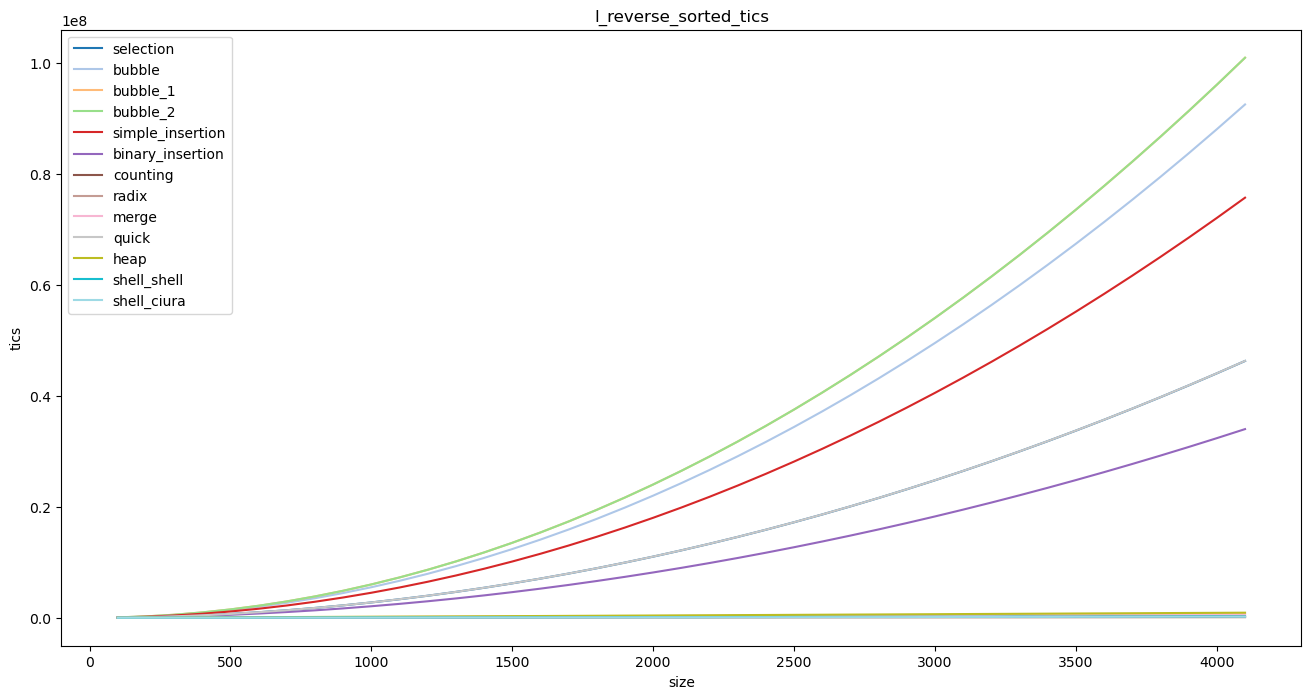

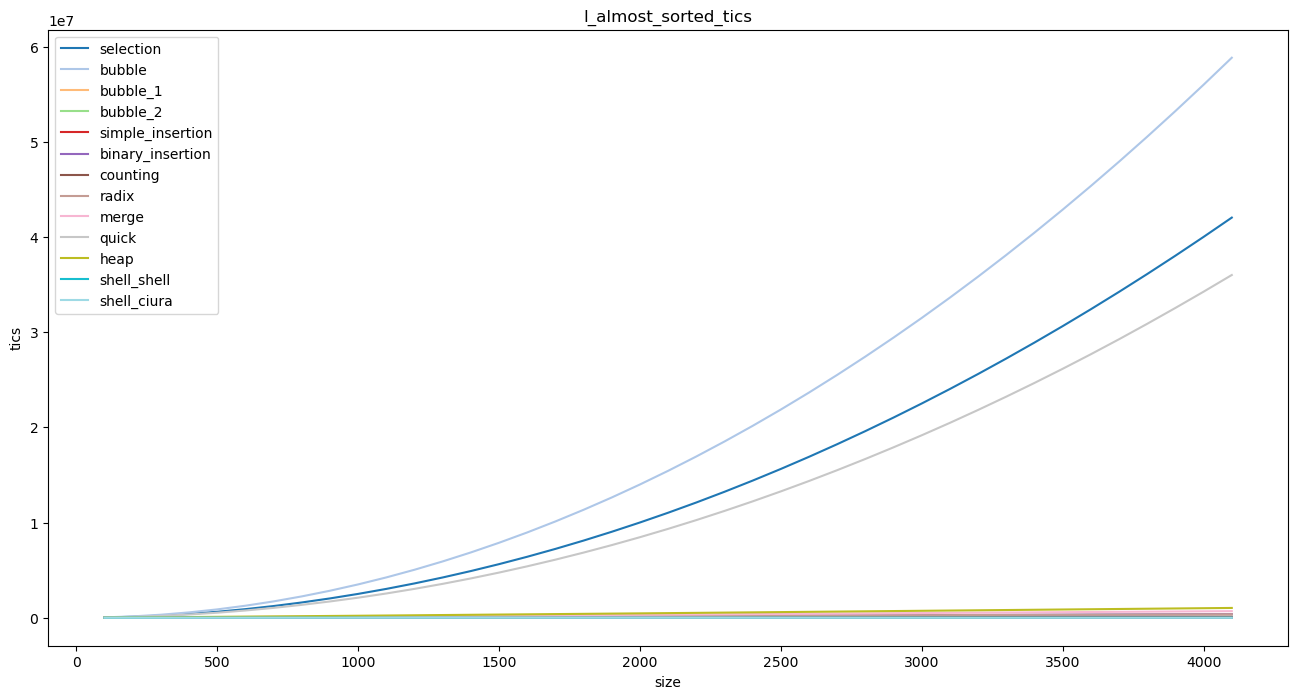

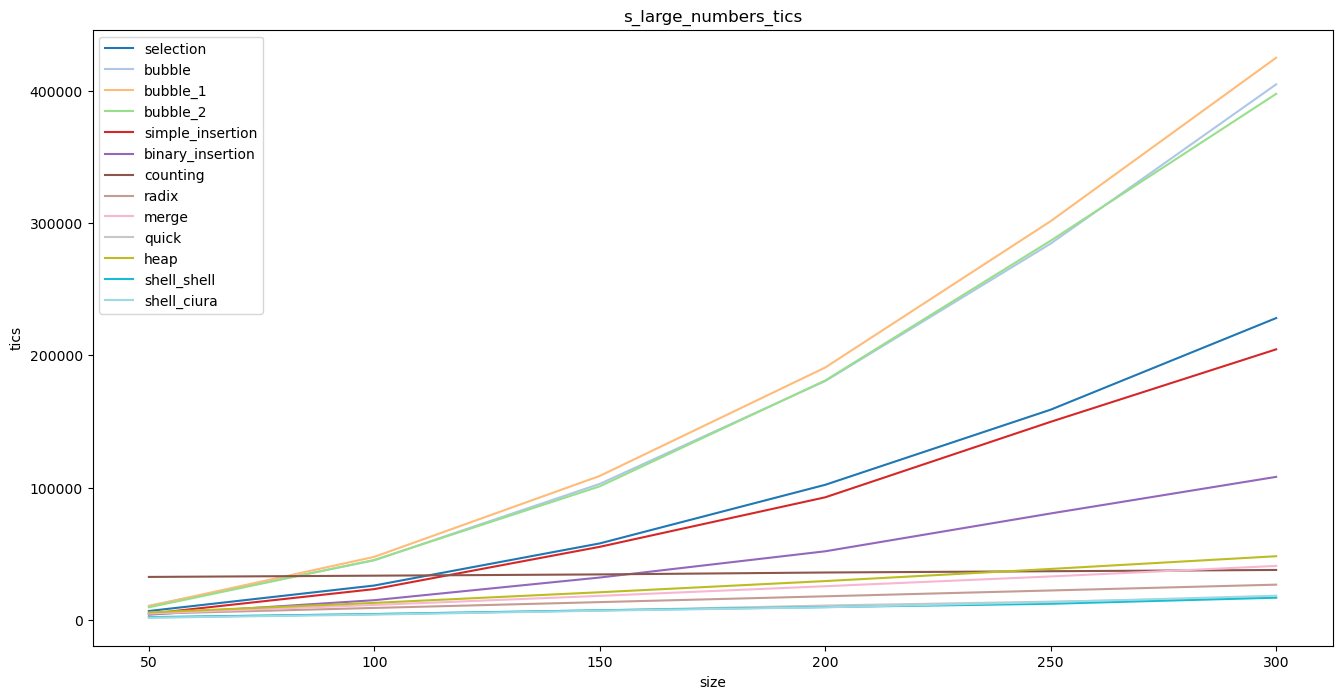

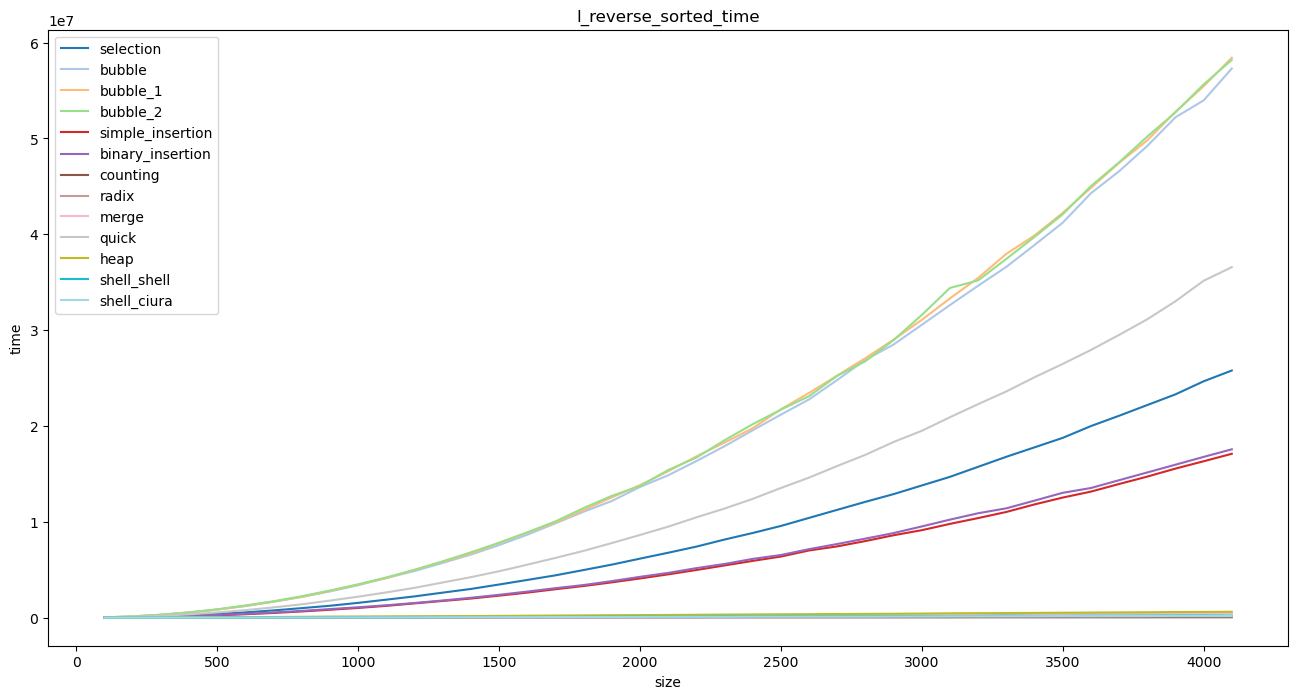

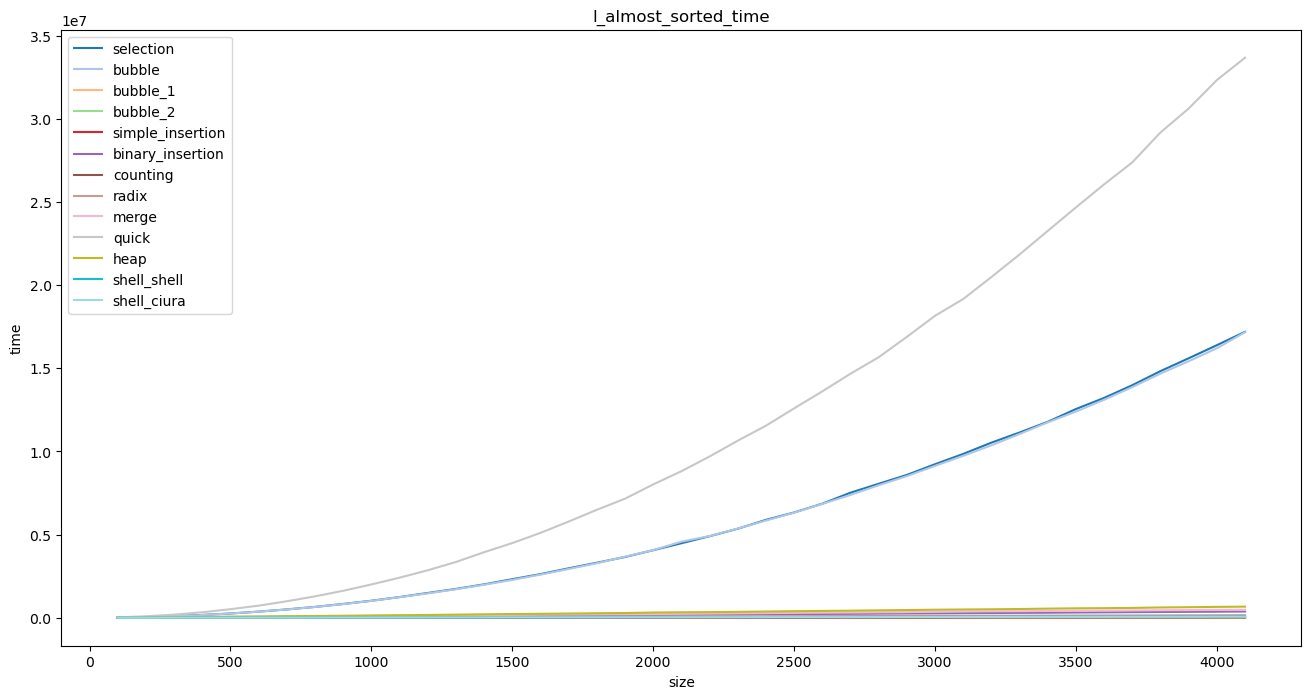

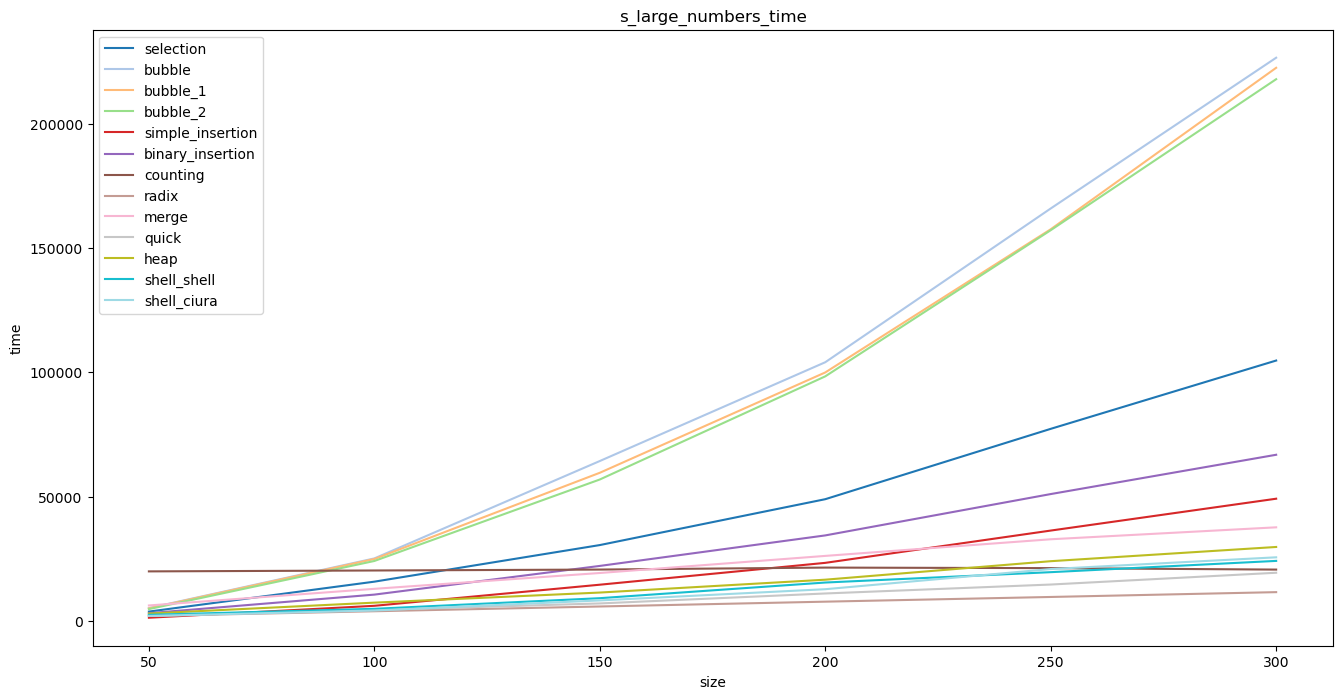

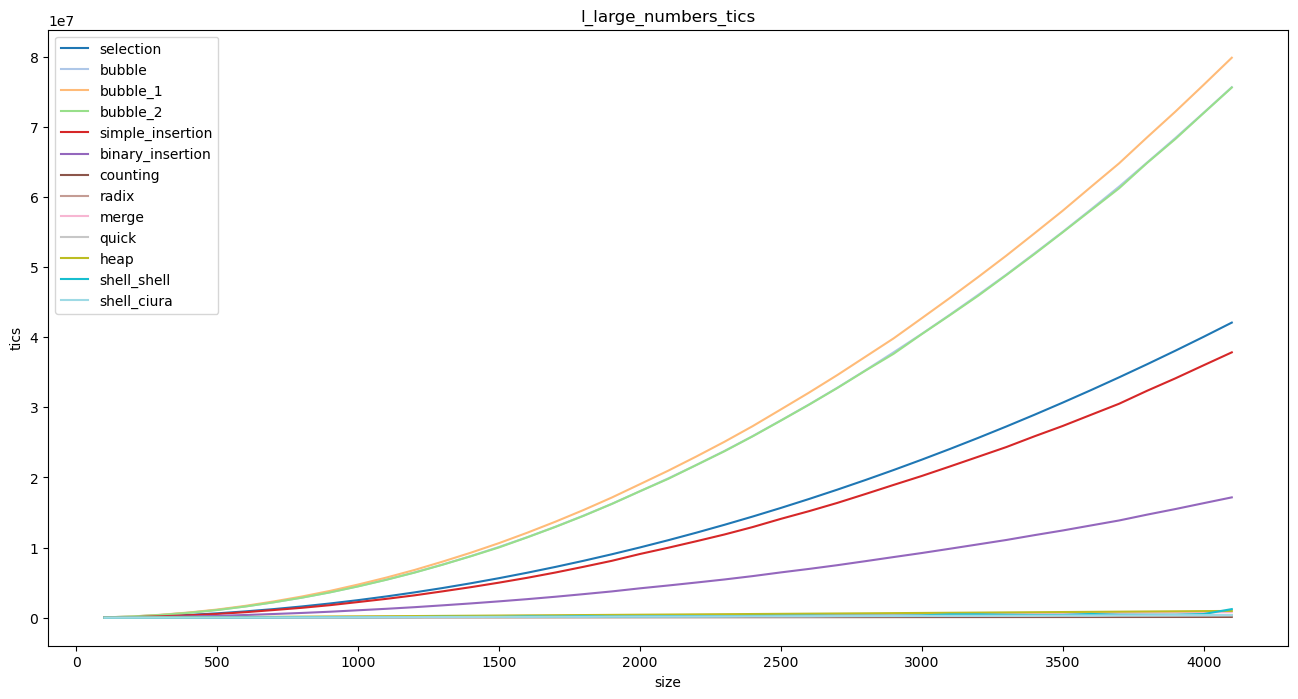

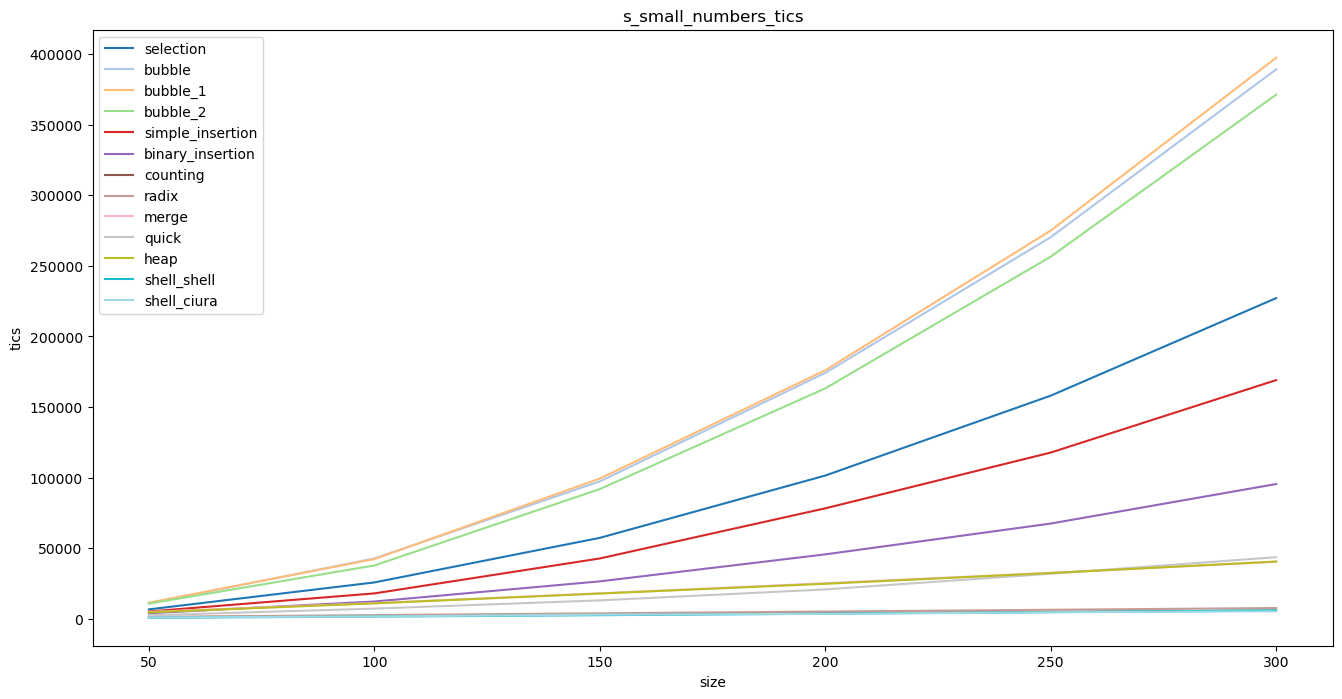

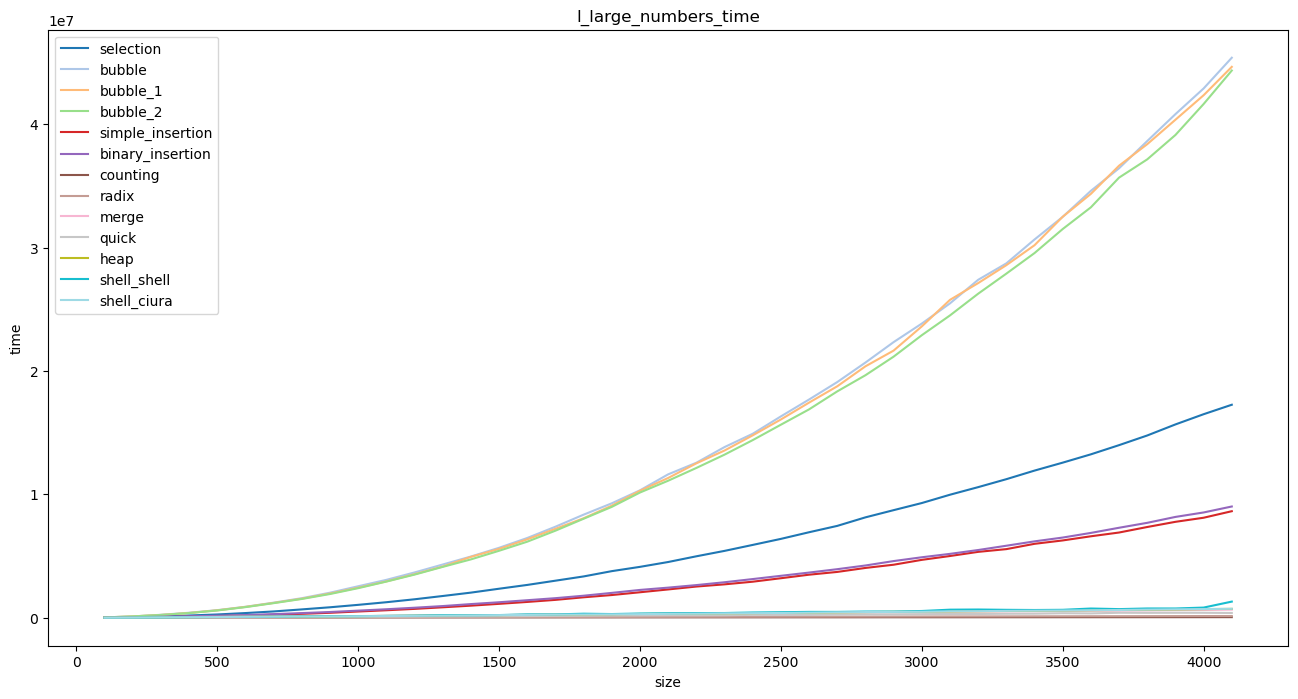

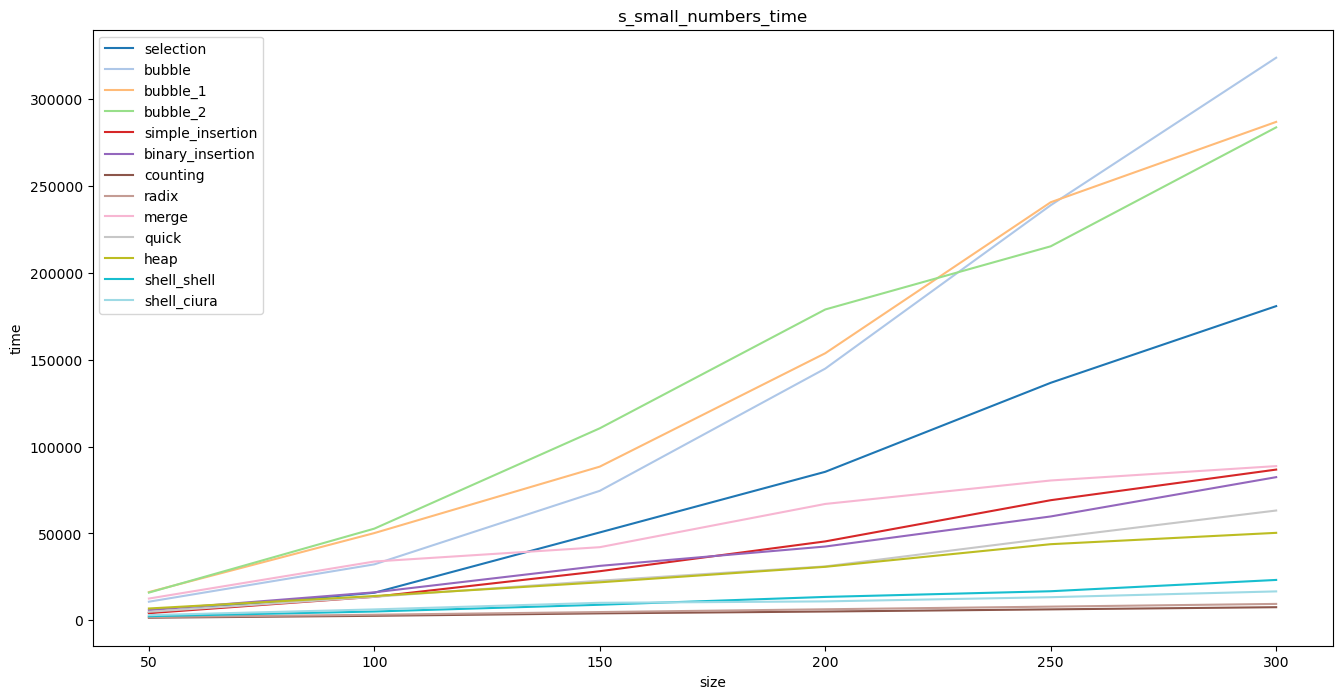

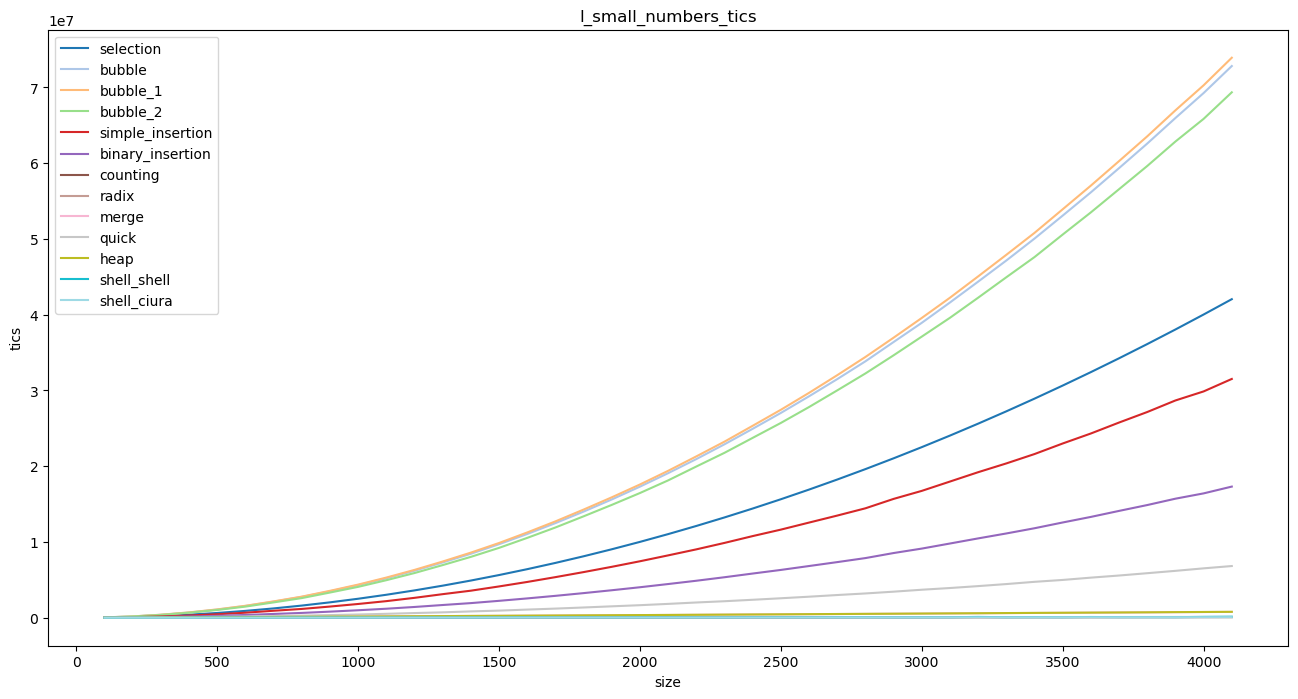

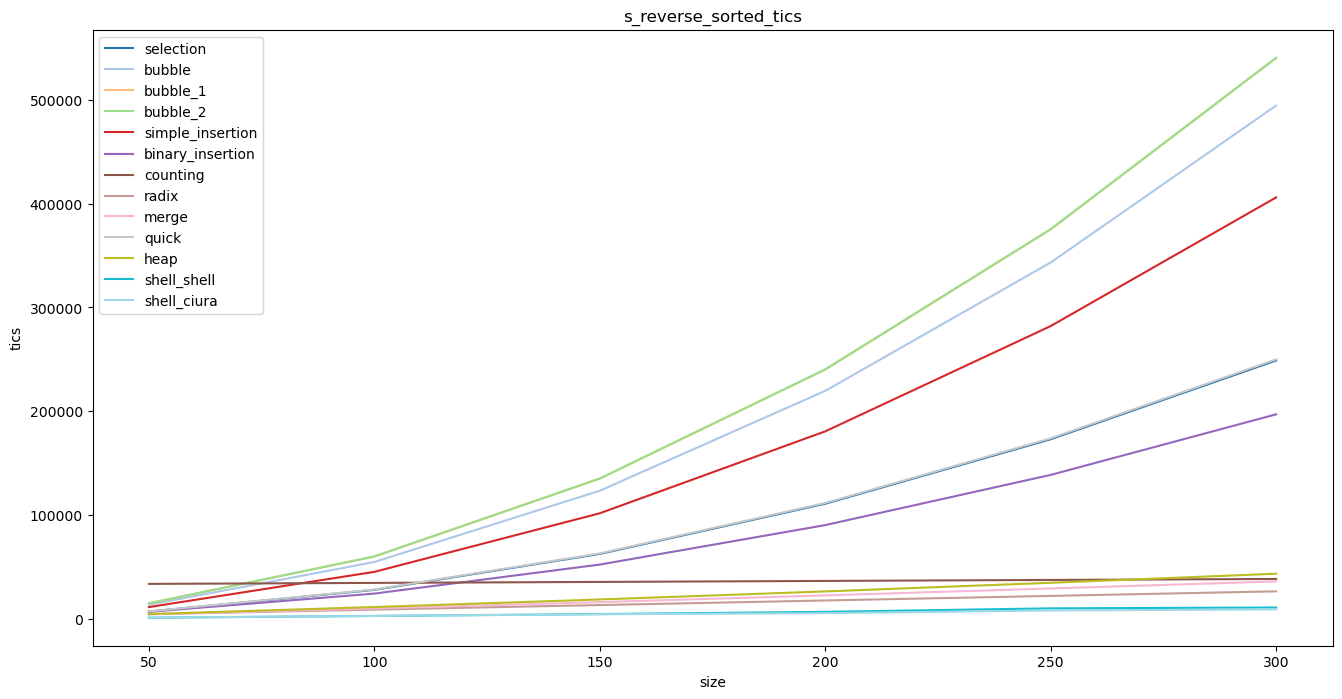

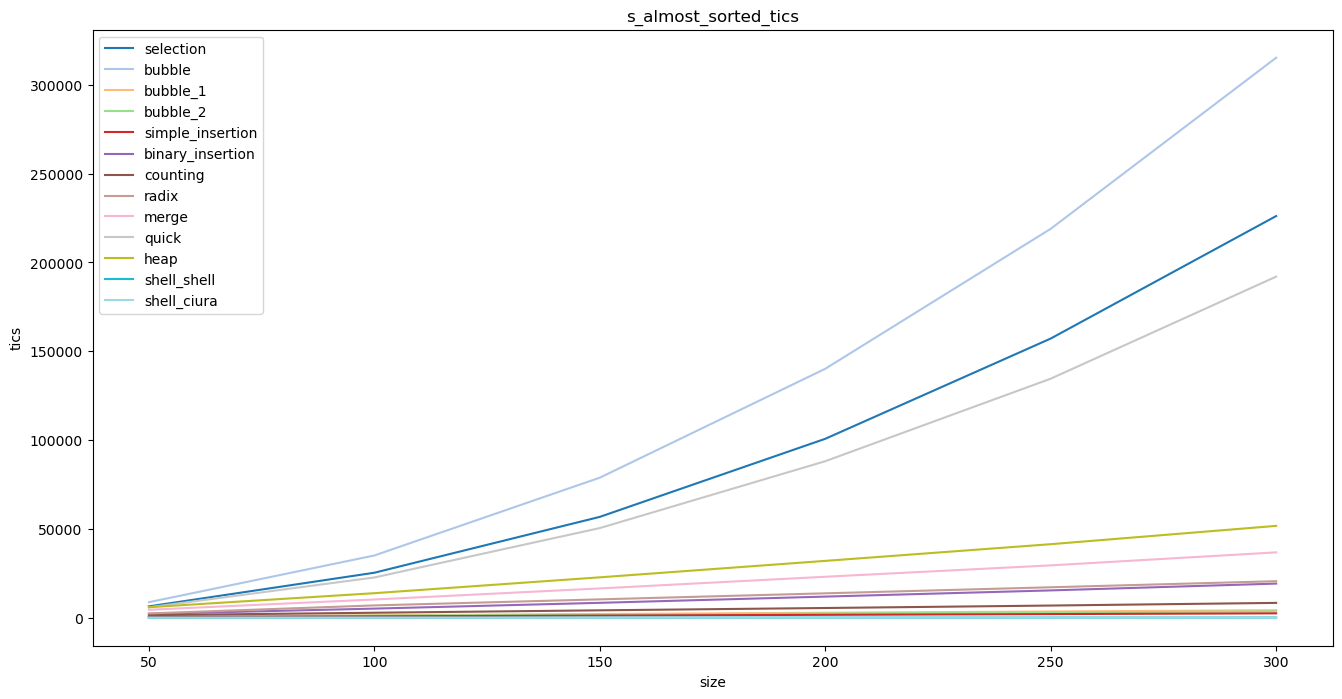

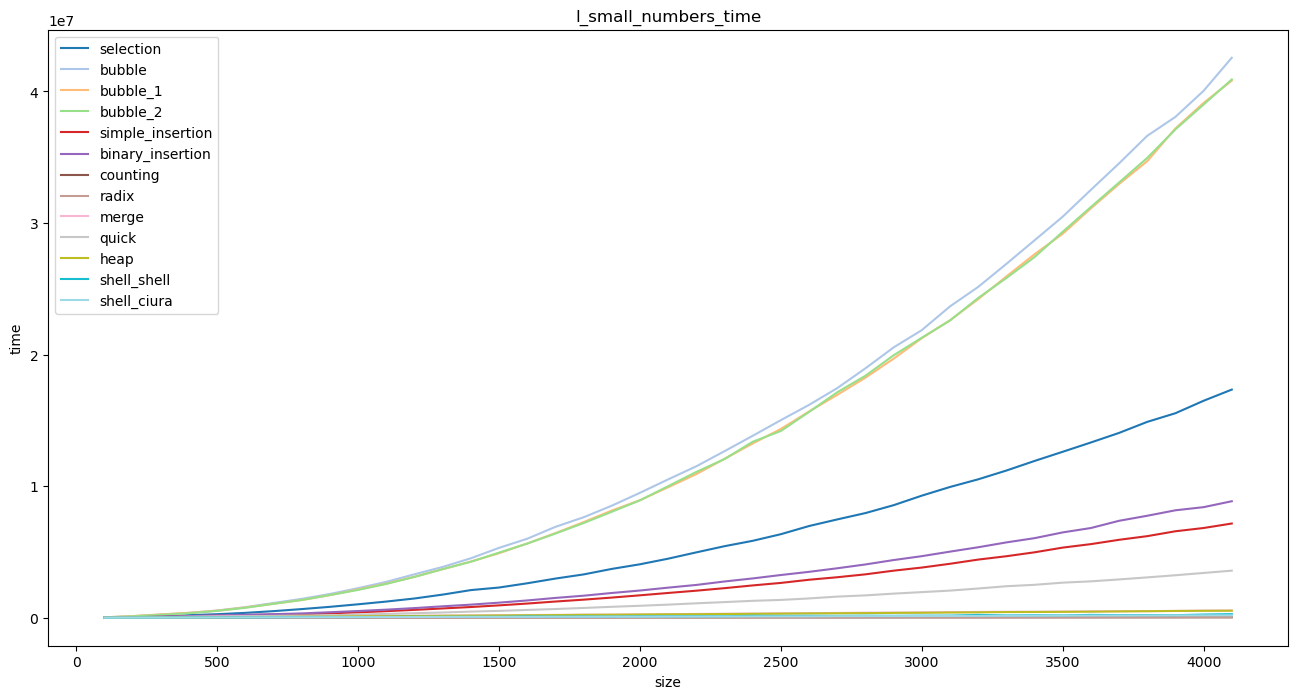

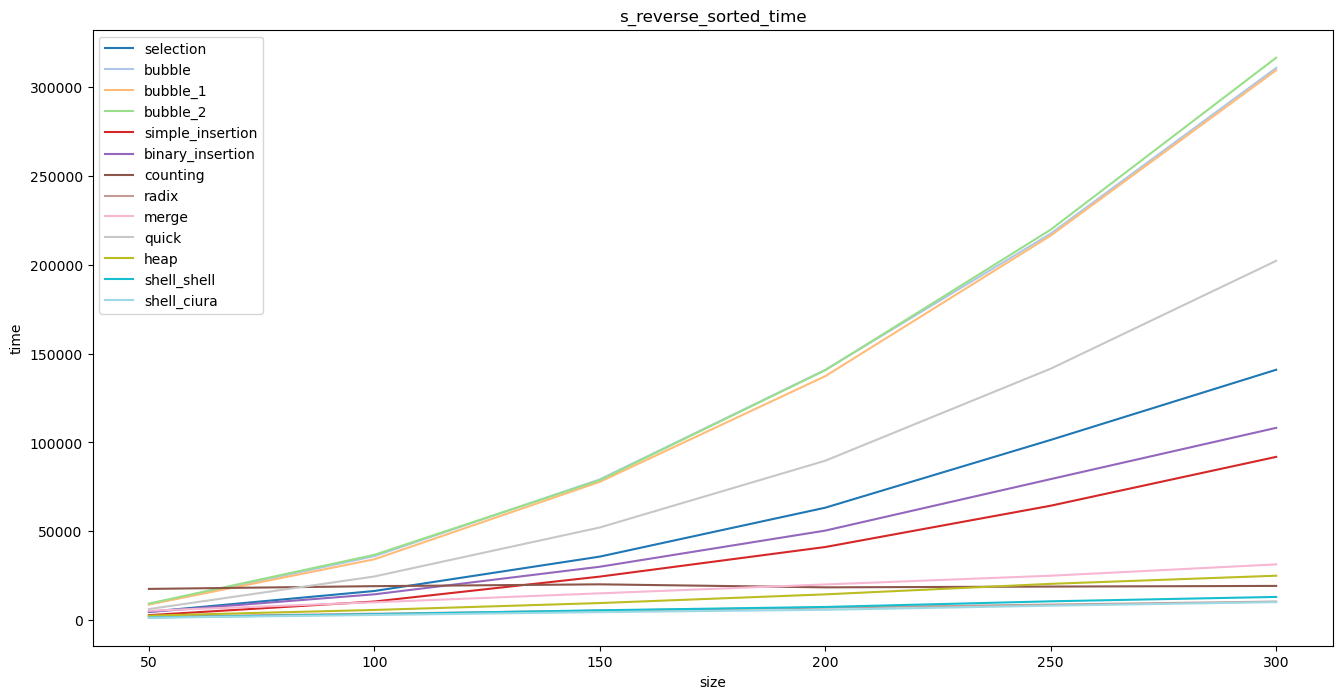

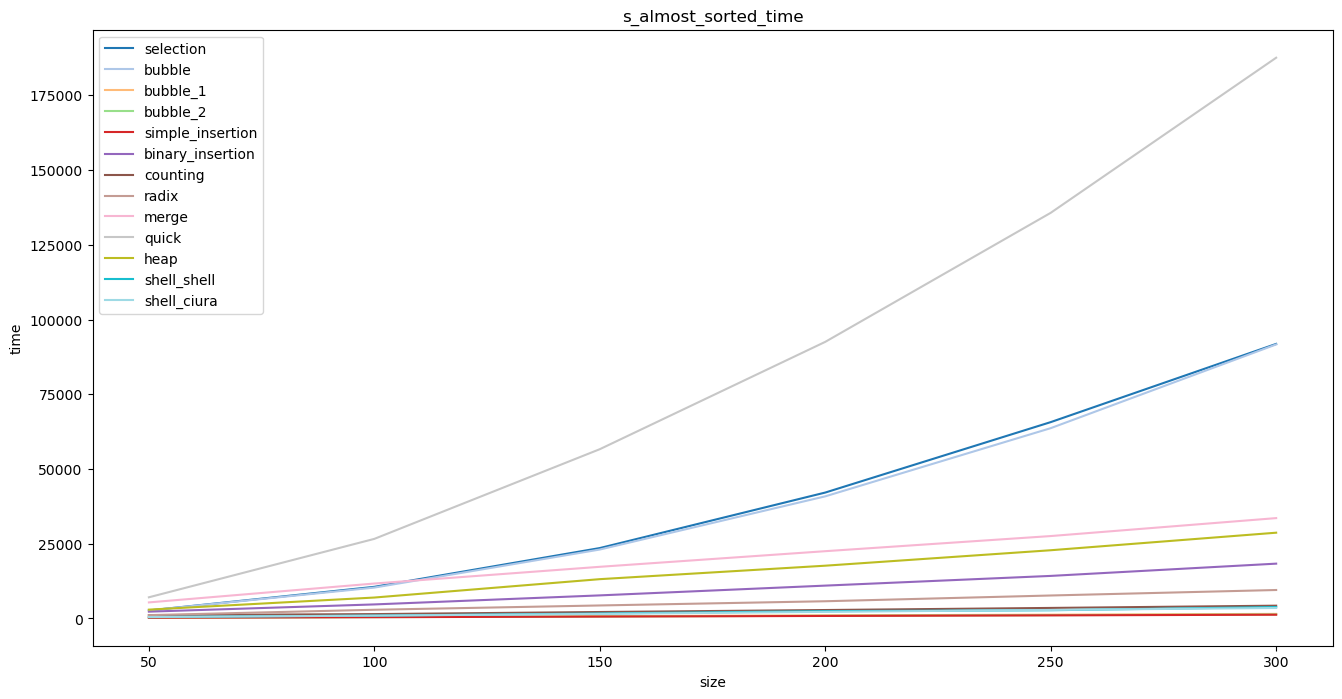

In [ ]:
for file in files:
    res = pd.read_csv(f"{methods[0]}/{file}.csv",sep=';').rename(columns={file[-4:]: methods[0]})
    for method in methods[1::]:
        res = pd.merge(res,pd.read_csv(f"{method}/{file}.csv",sep=';').rename(columns={file[-4:]: method}),on=['size'])
    res.set_index('size').plot(title=file[5:],ylabel= file[-4:],xlabel='size',colormap="tab20")



c:\Users\vladi\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


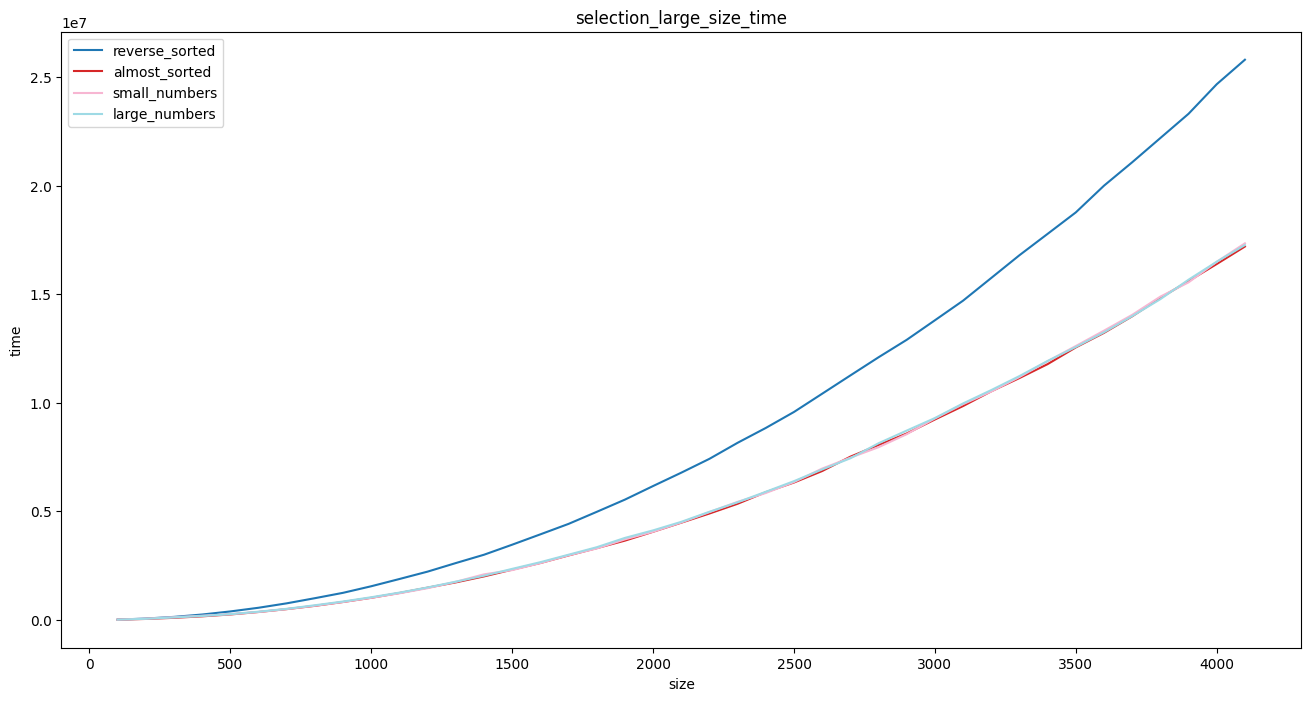

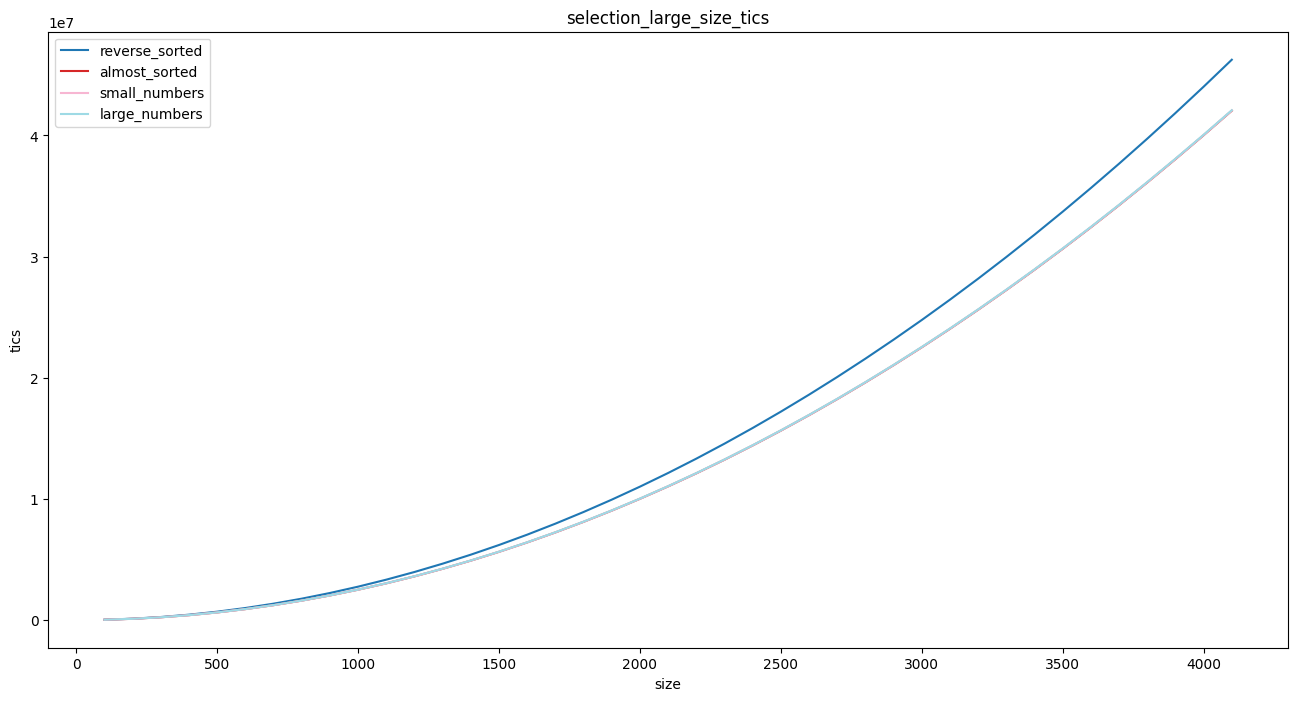

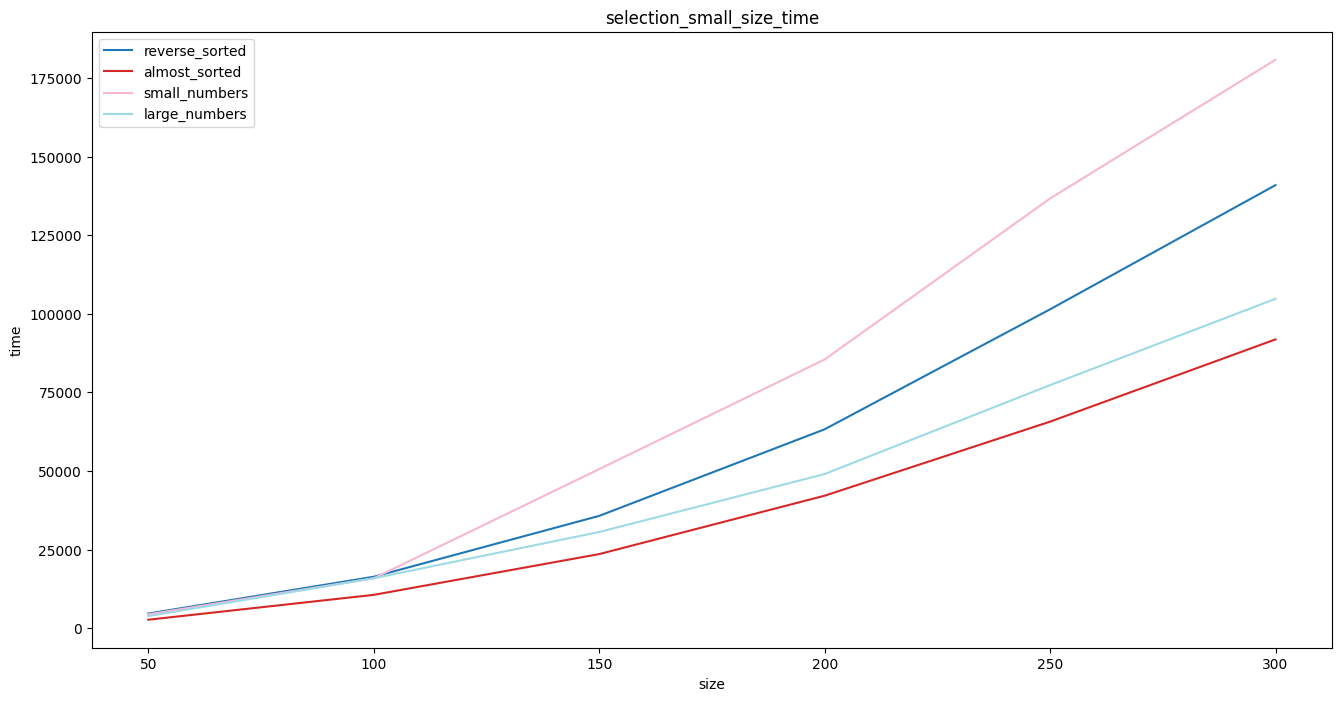

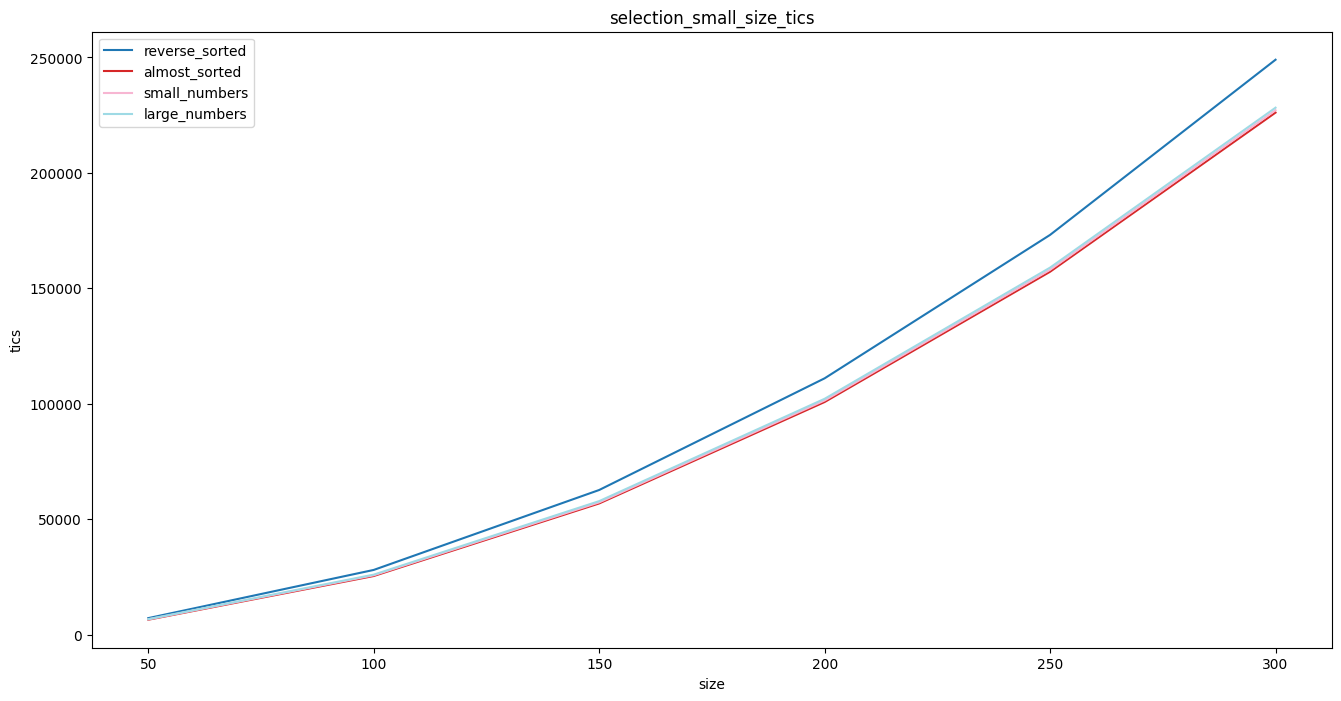

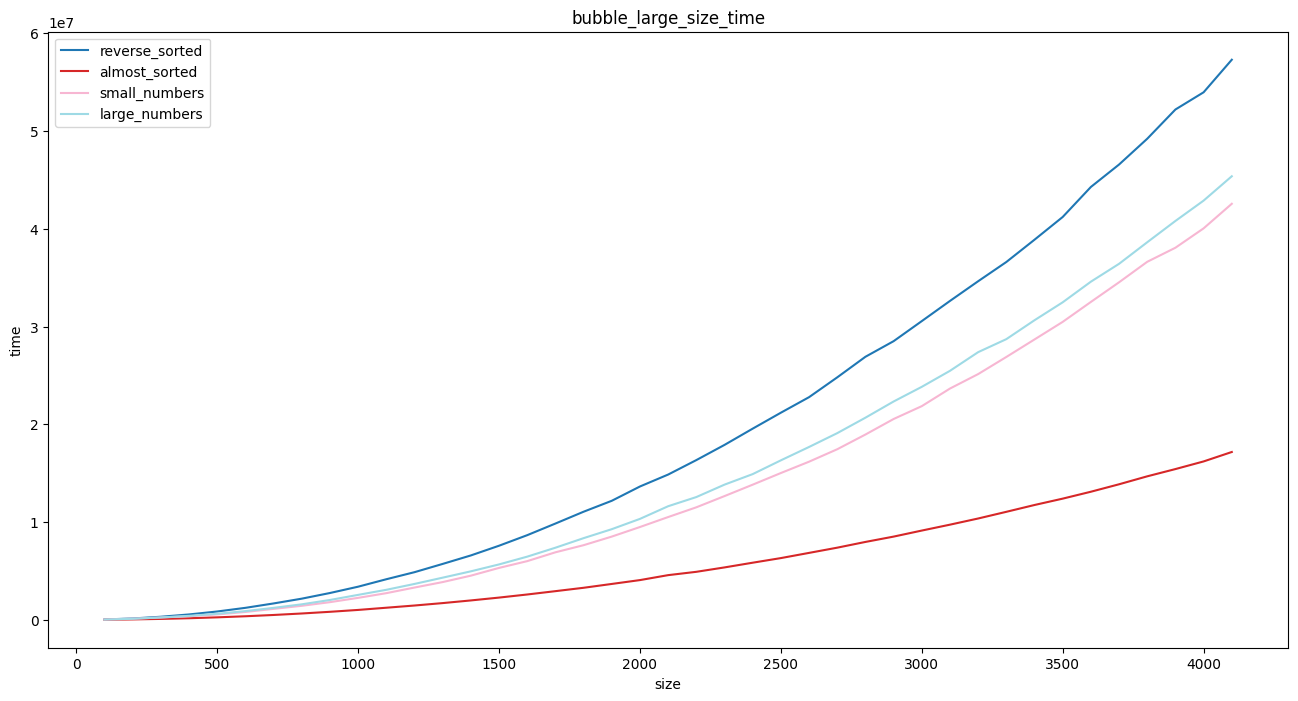

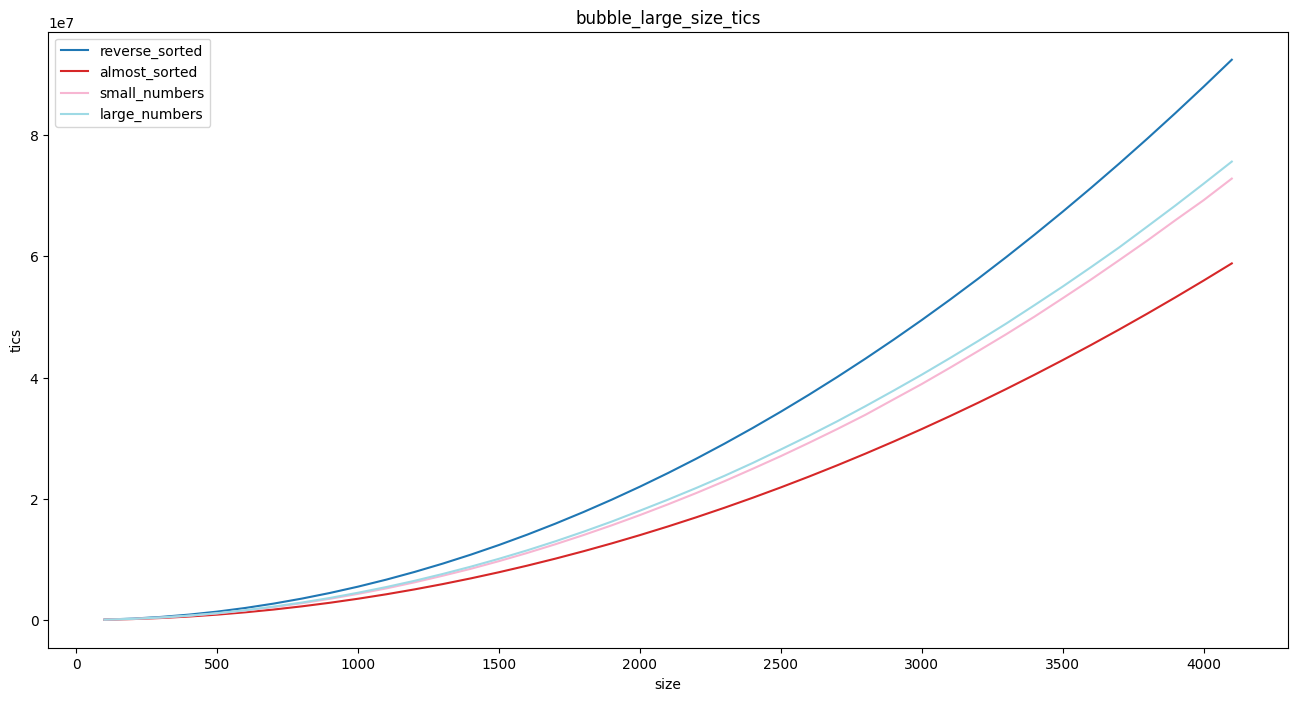

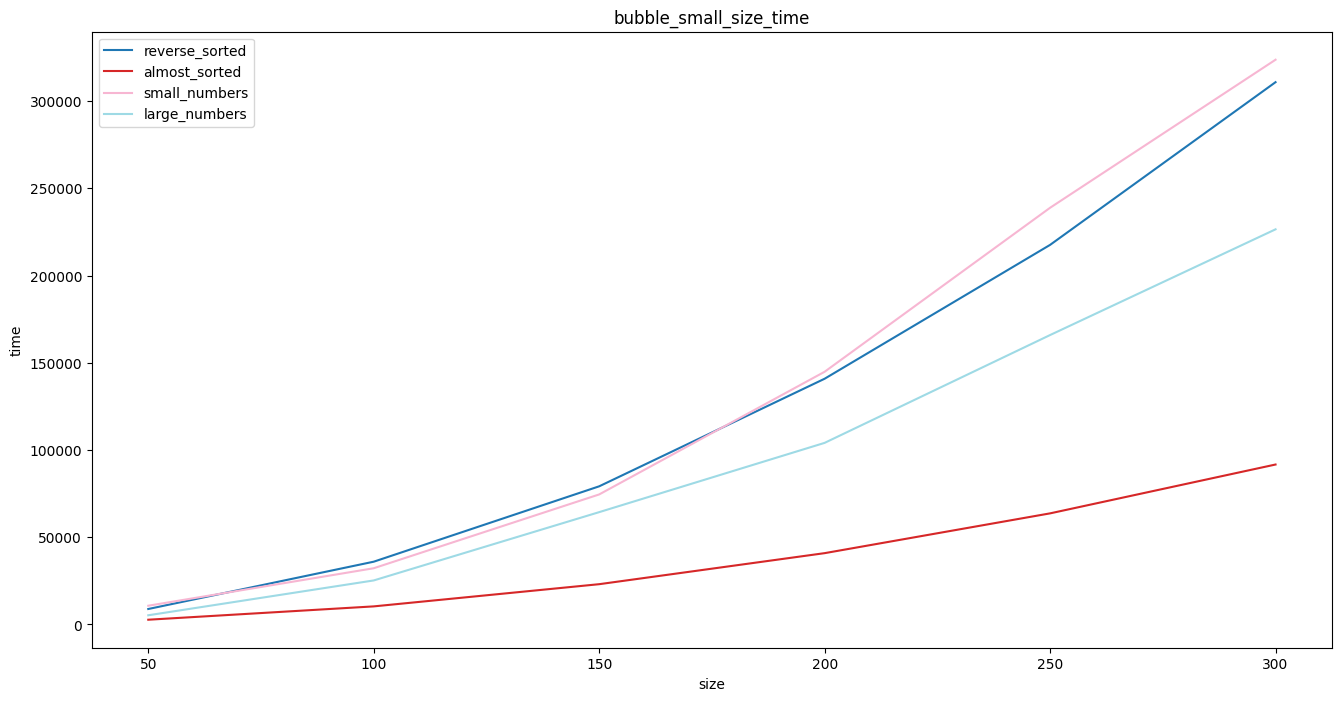

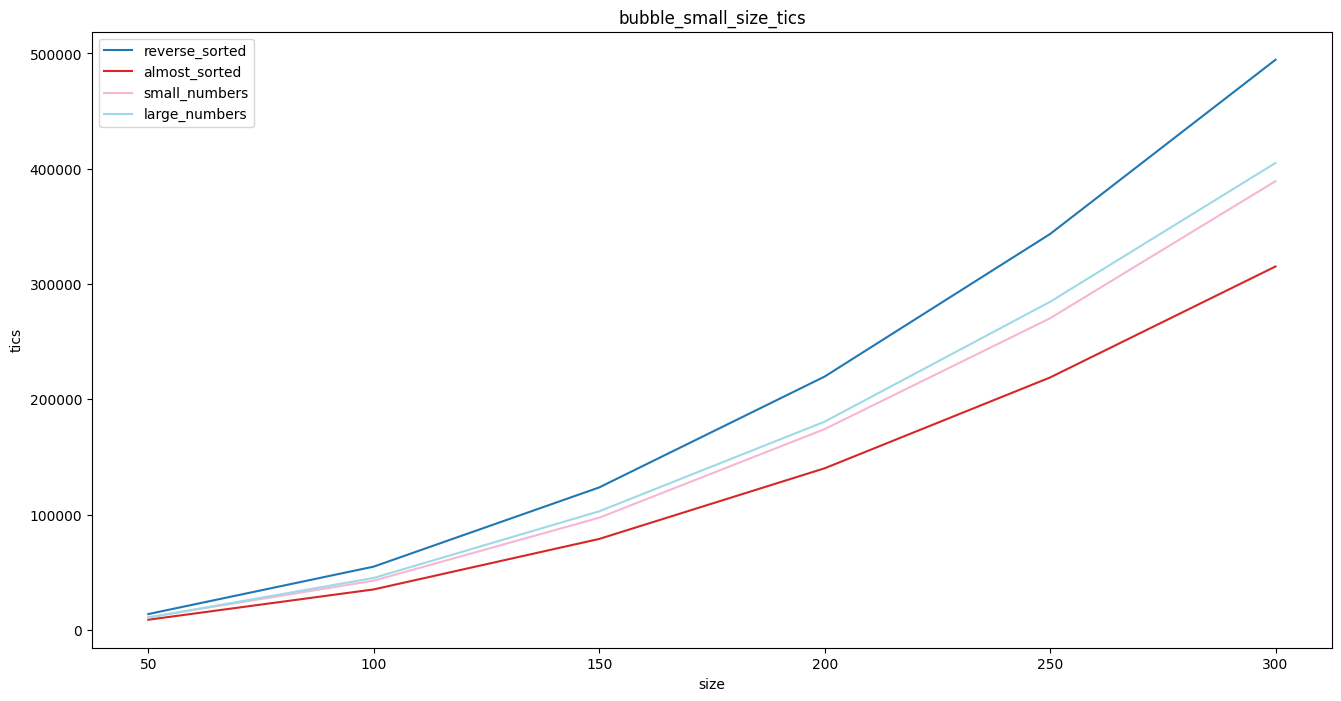

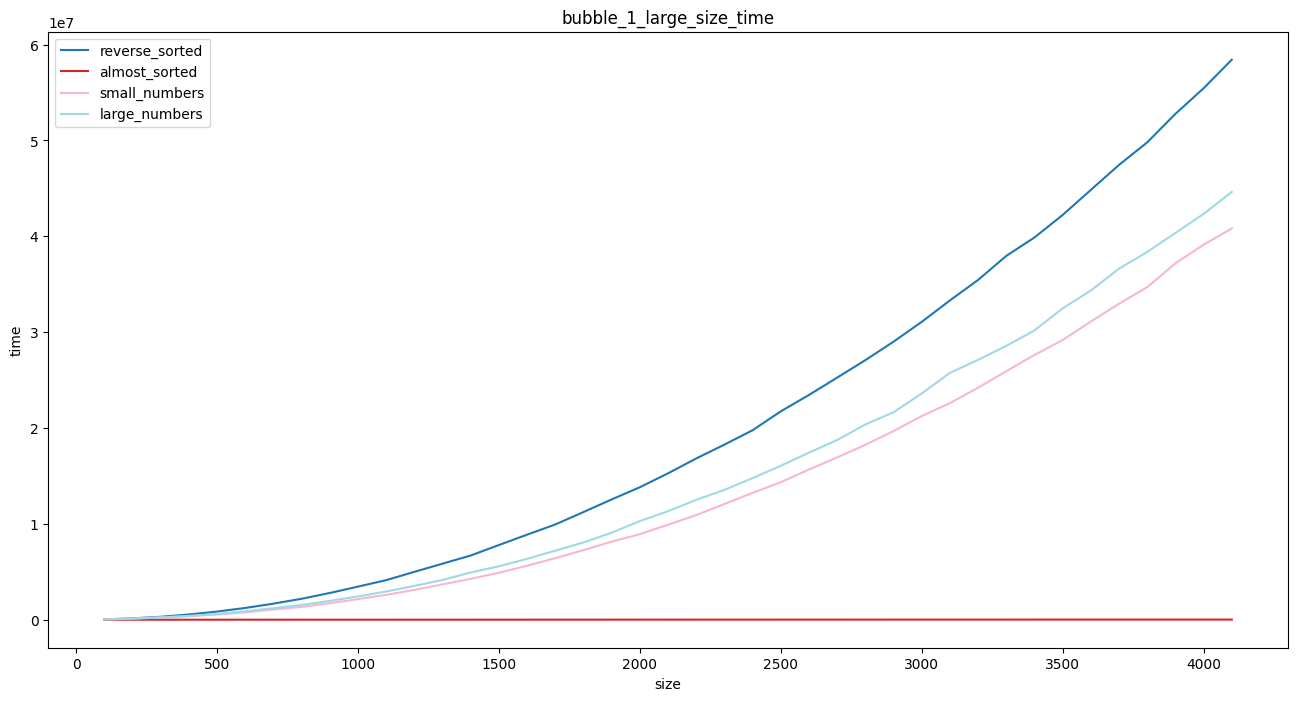

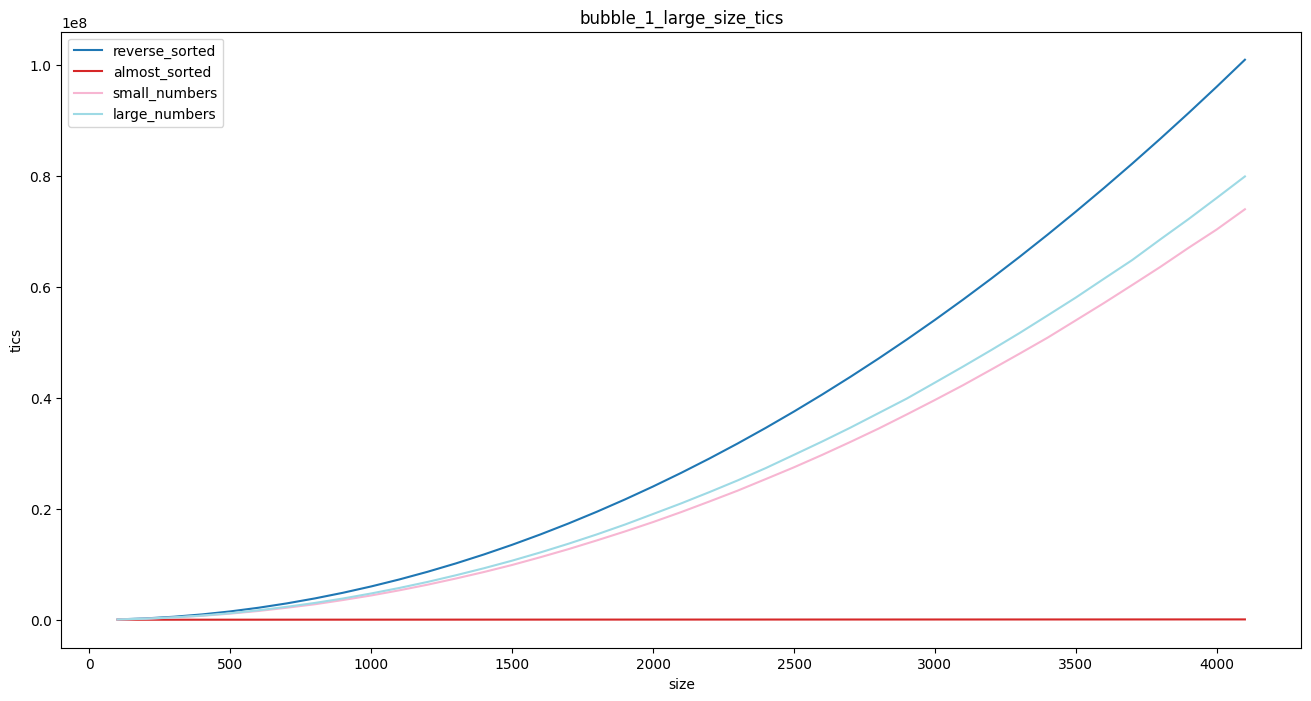

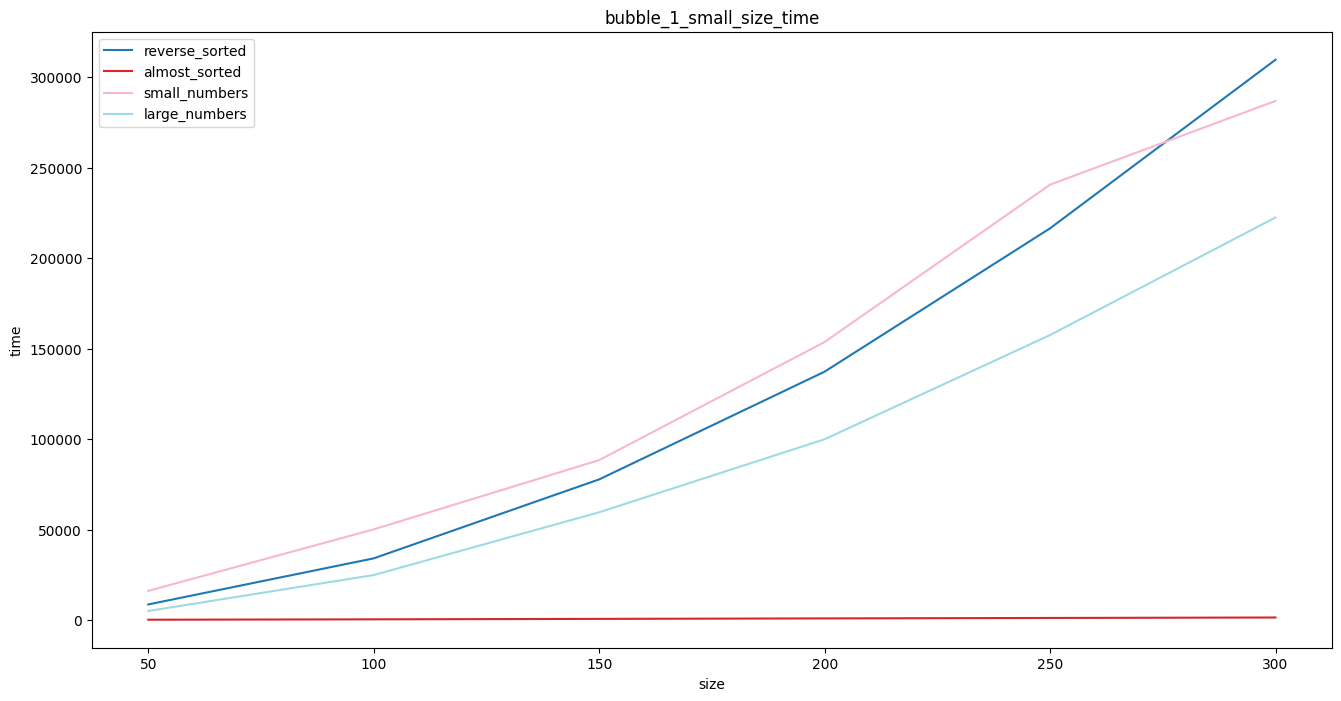

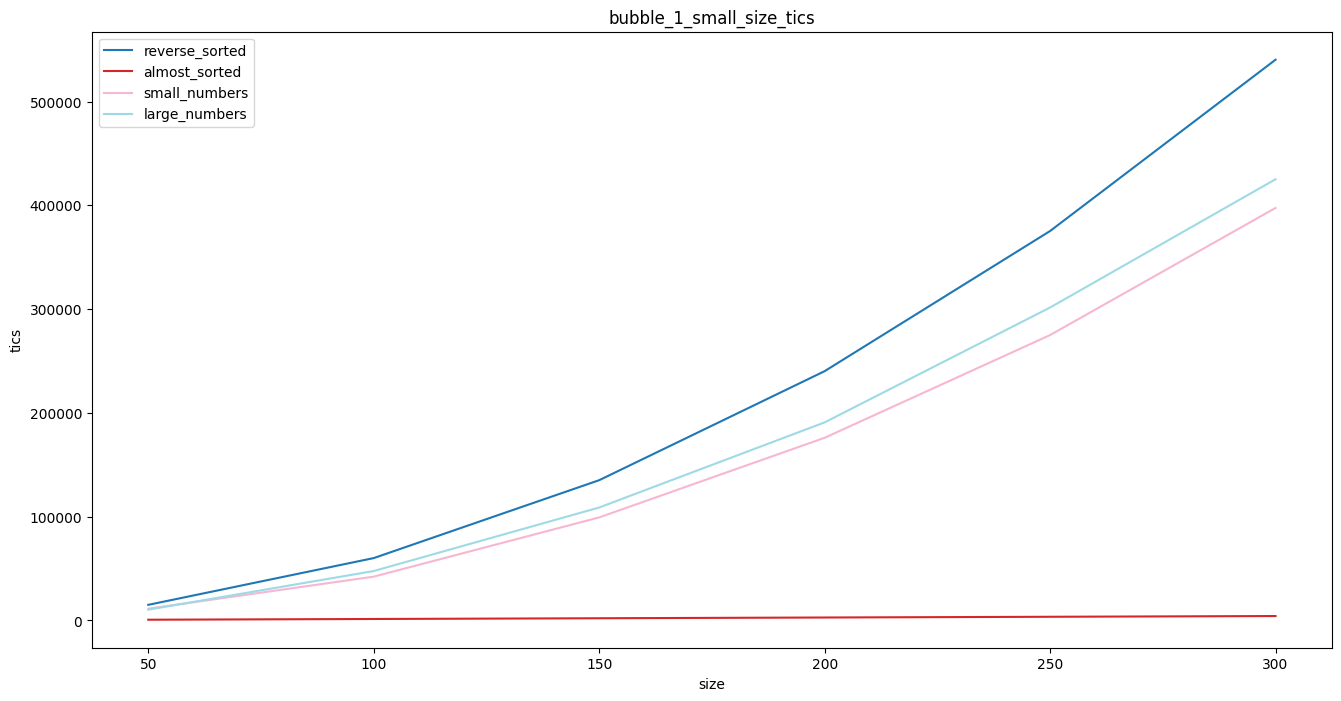

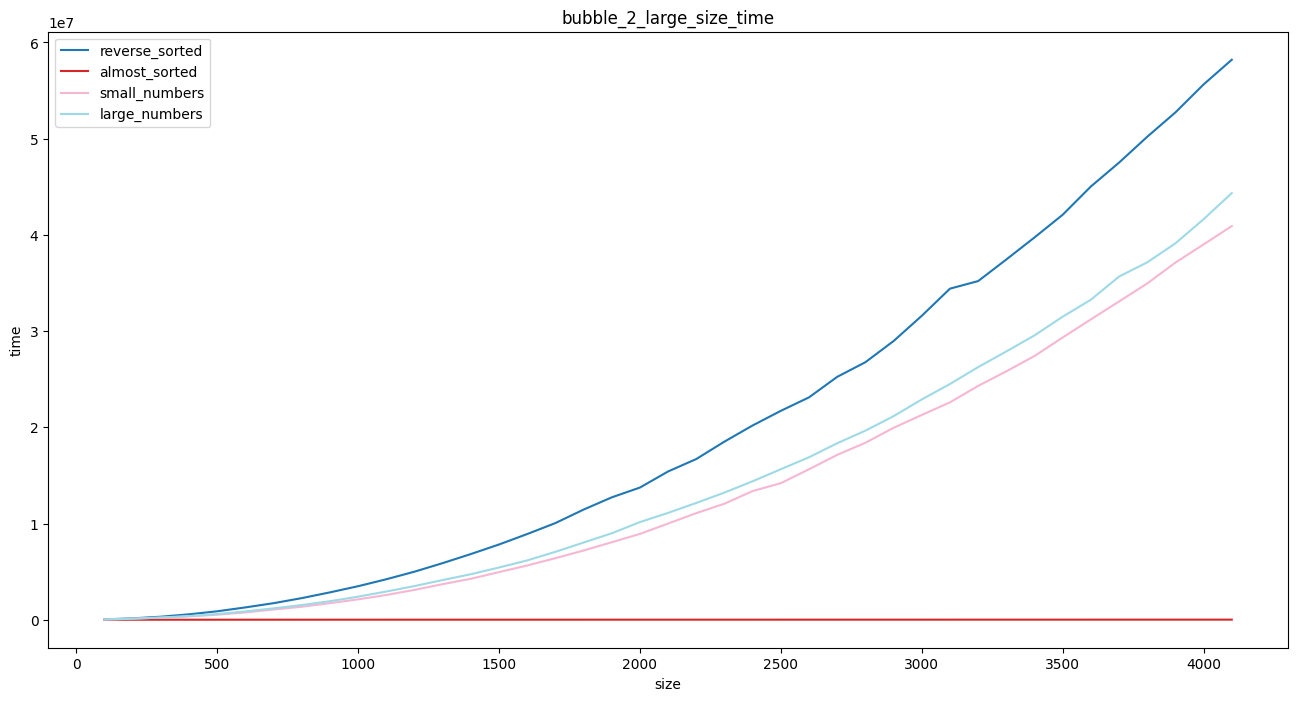

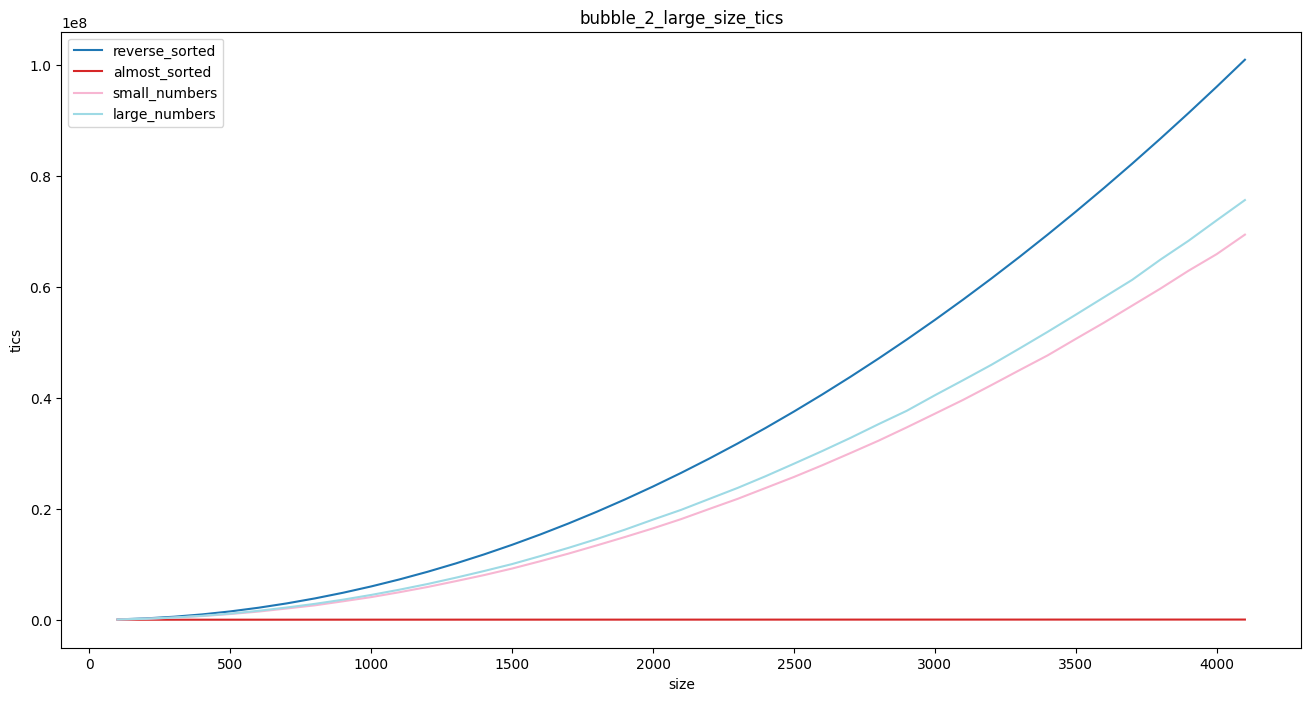

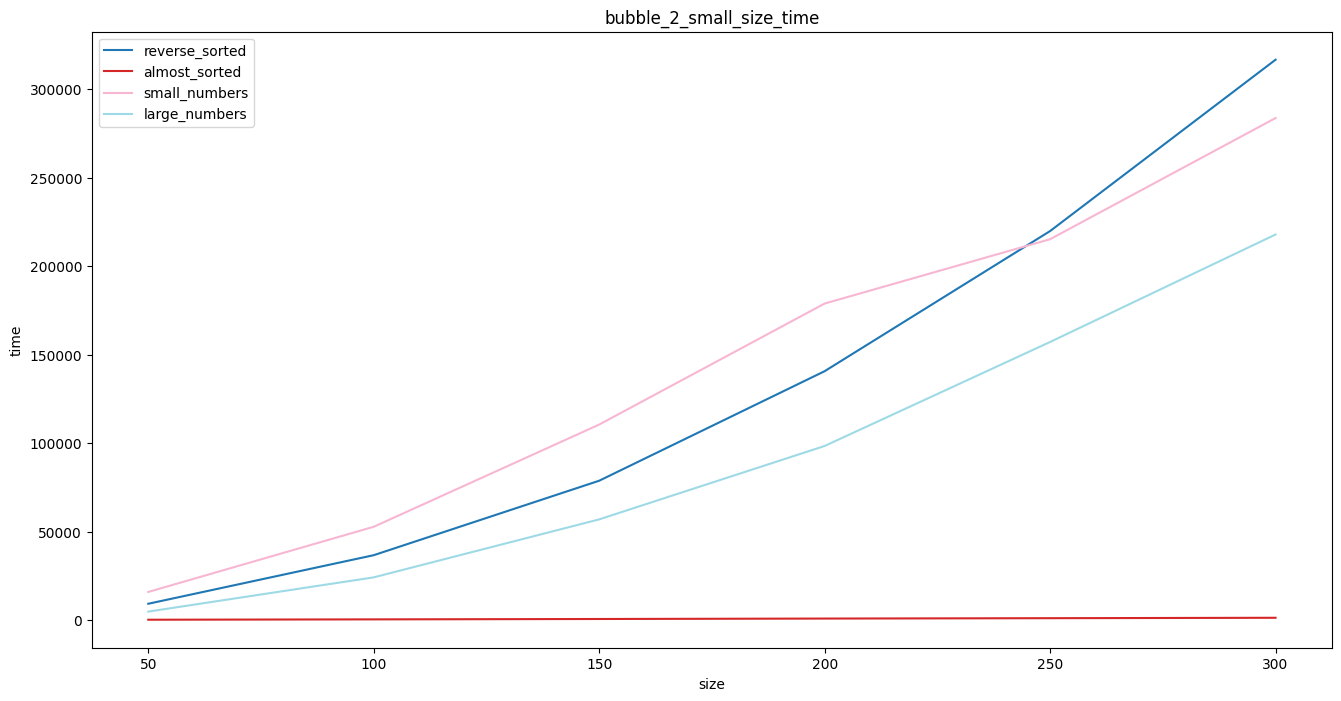

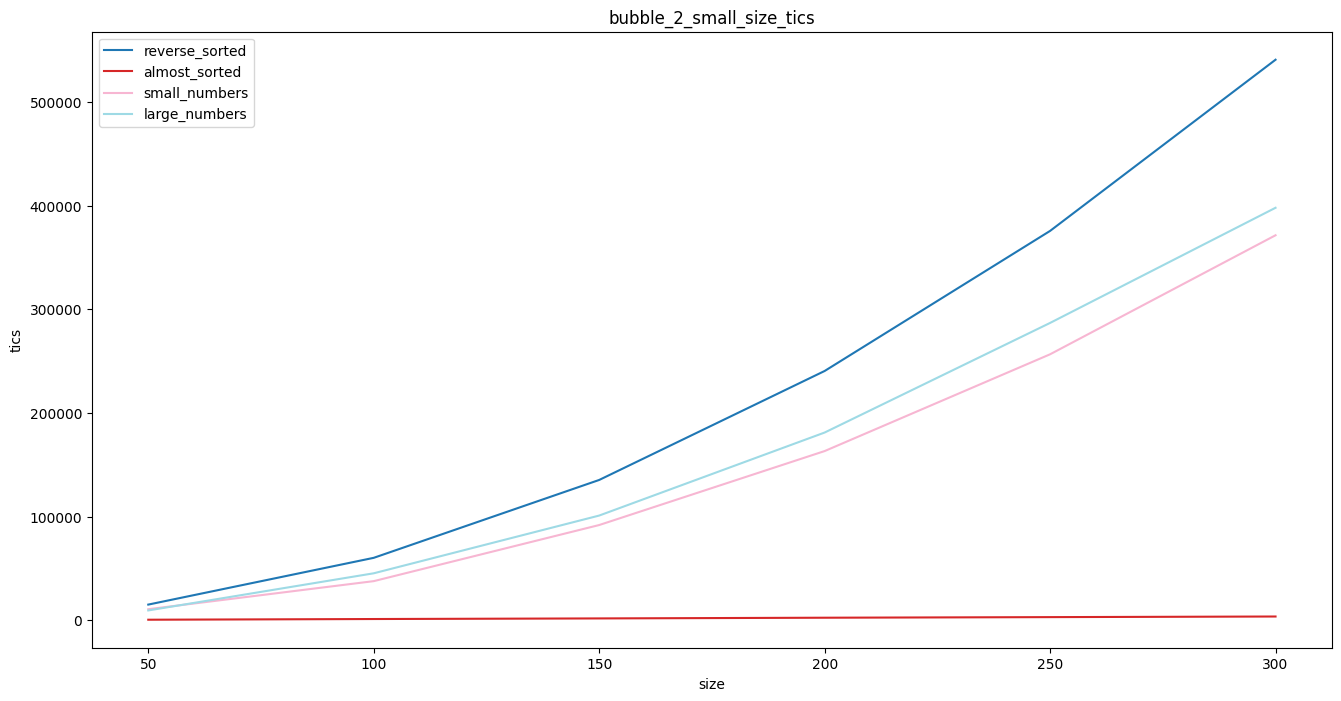

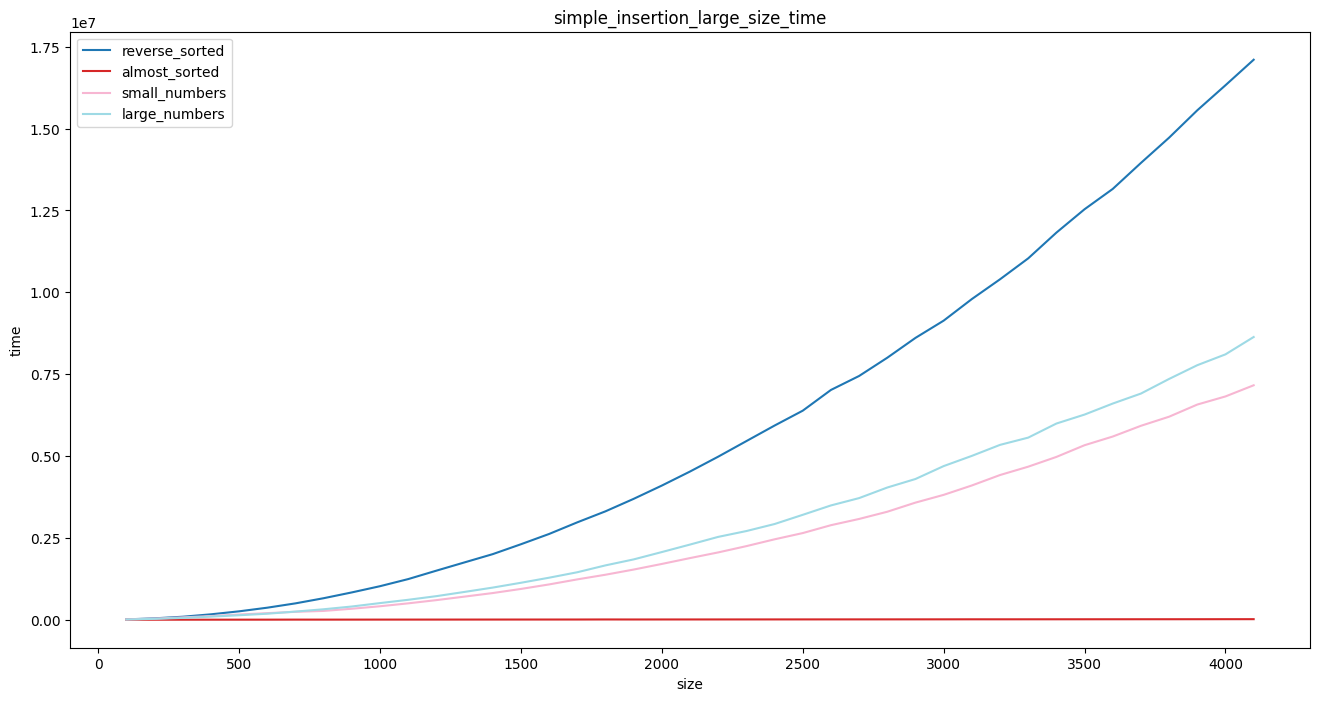

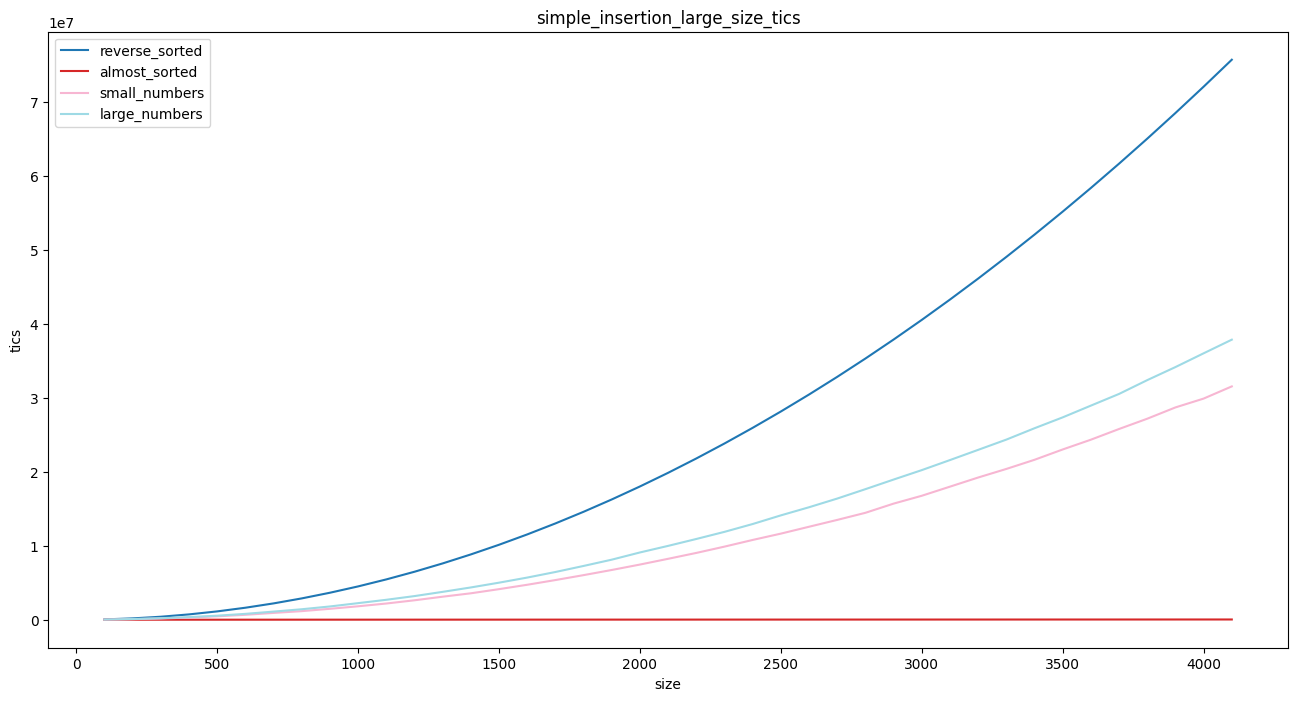

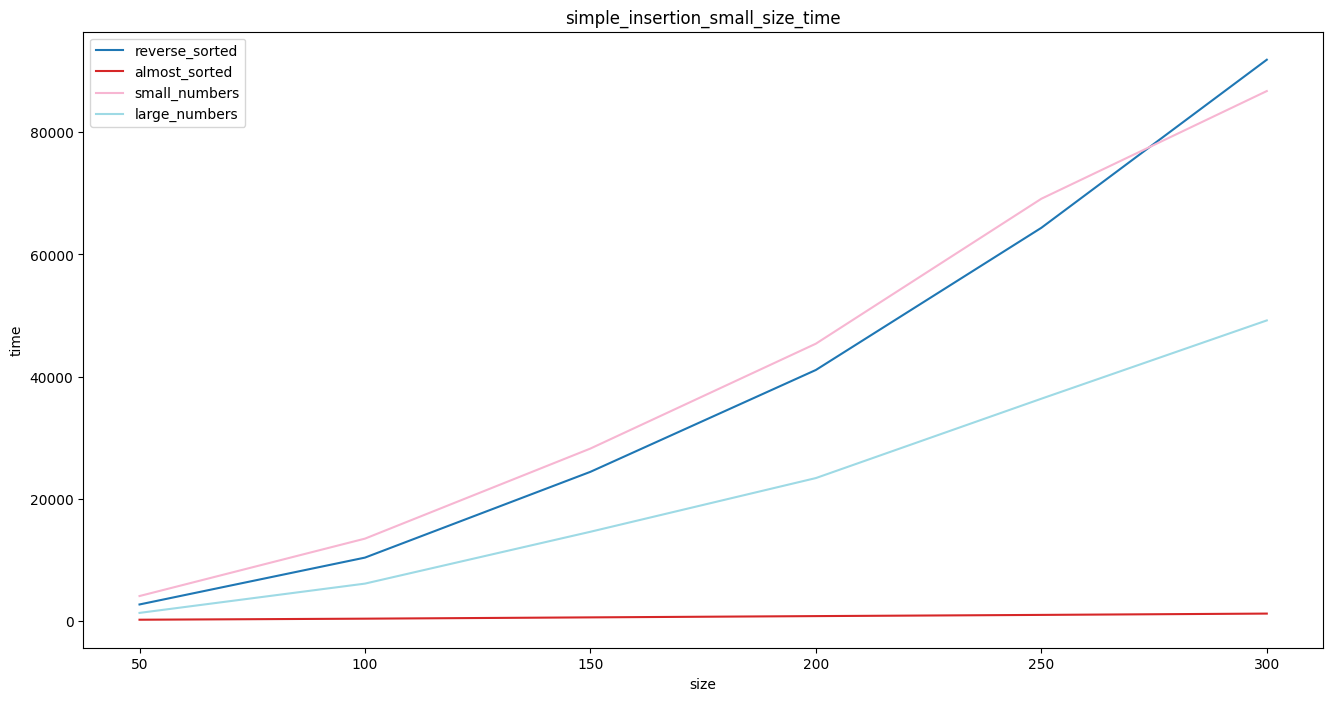

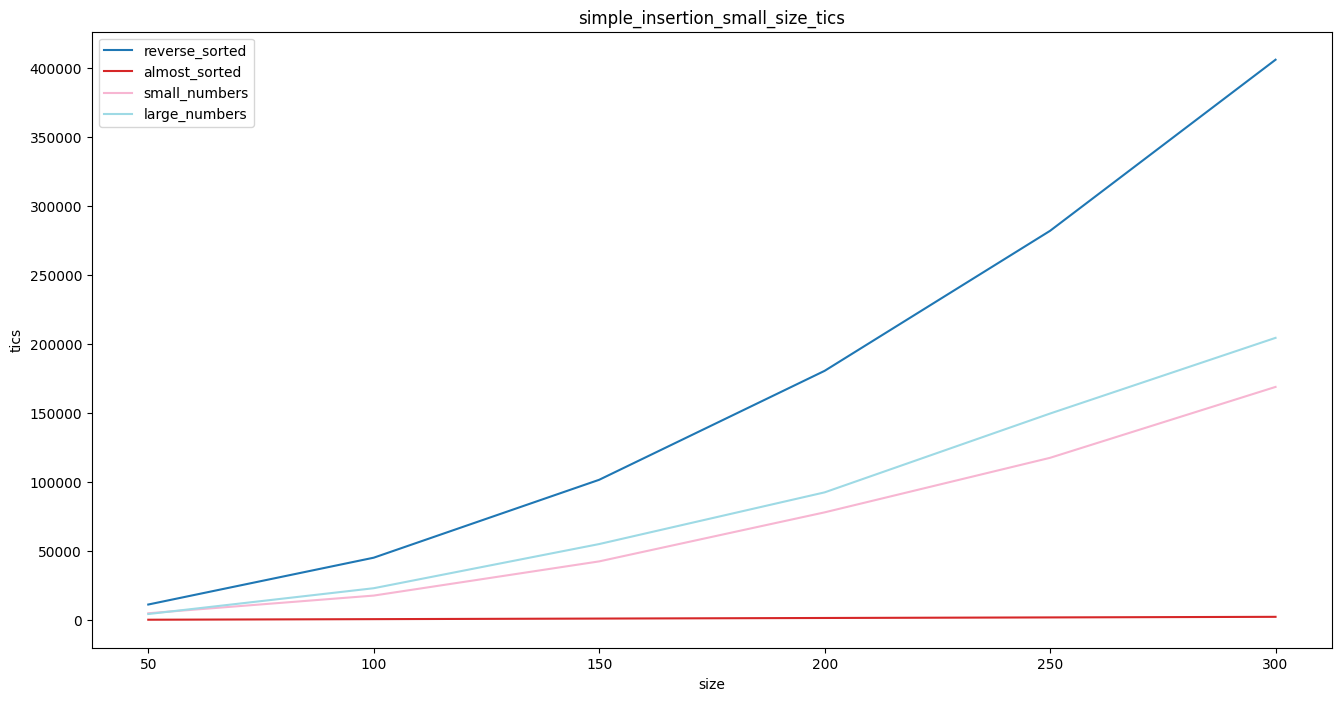

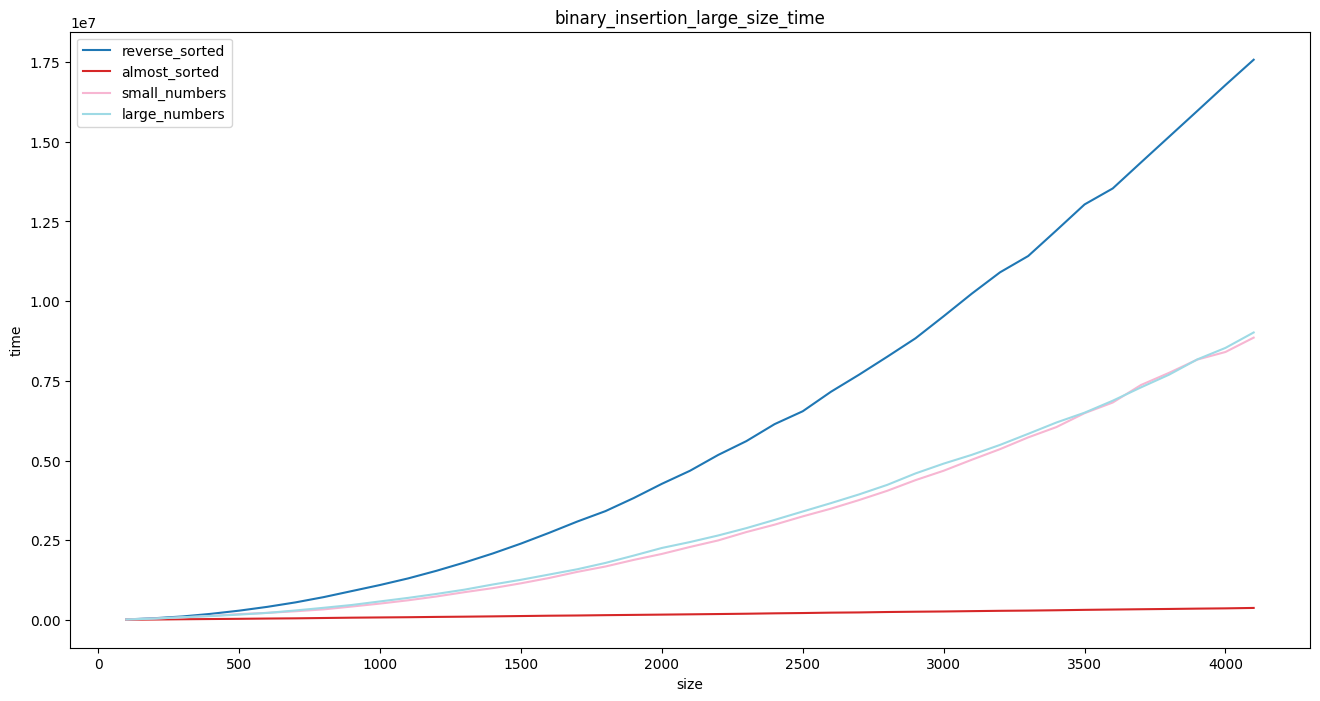

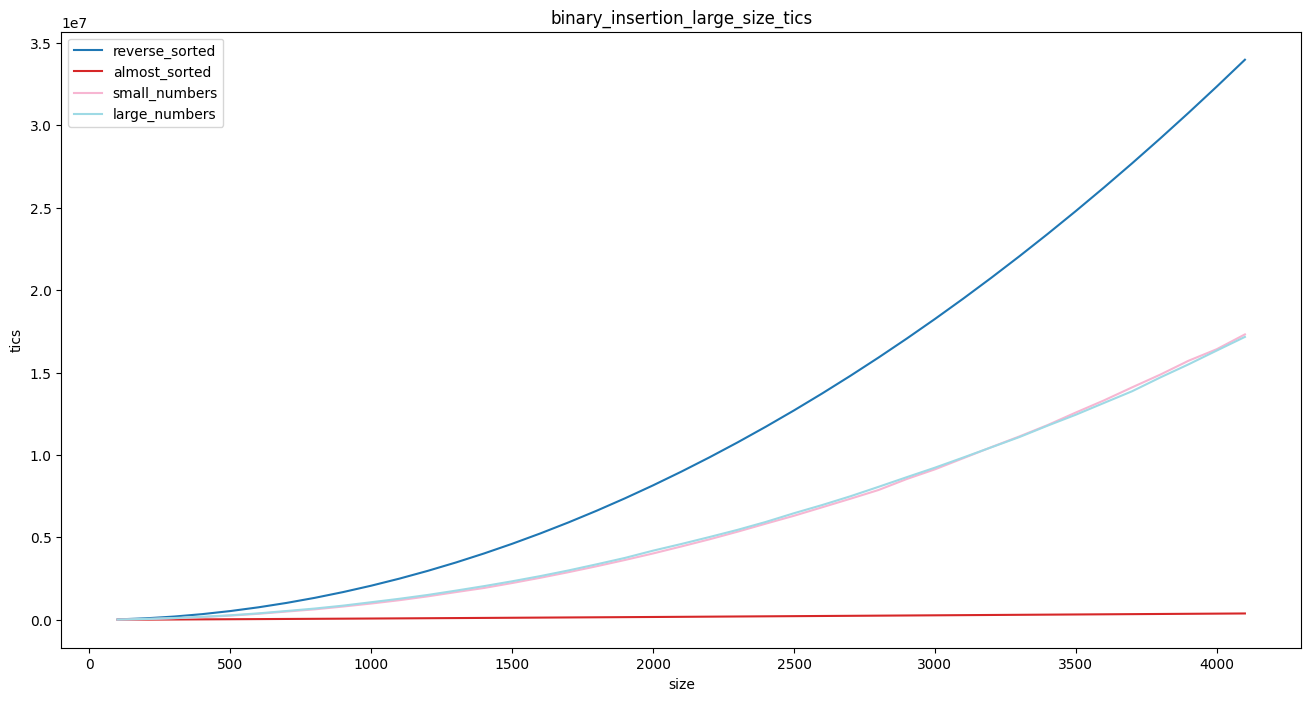

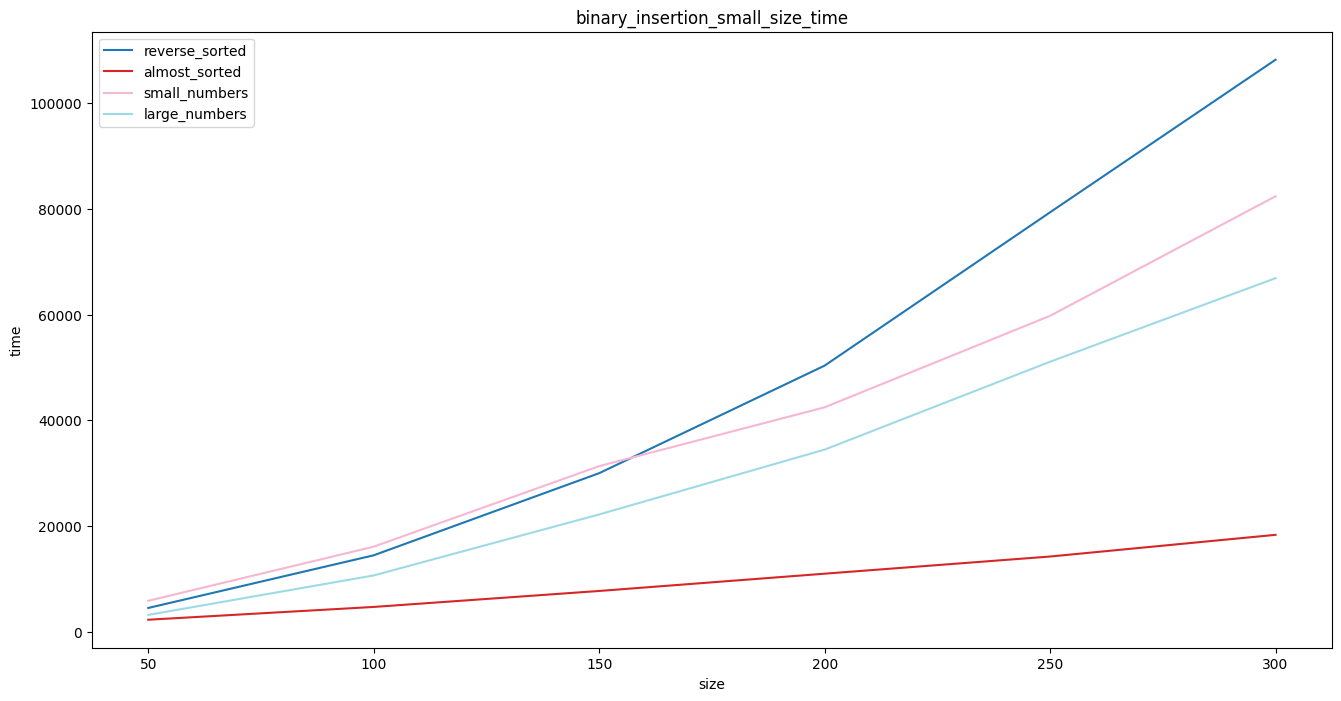

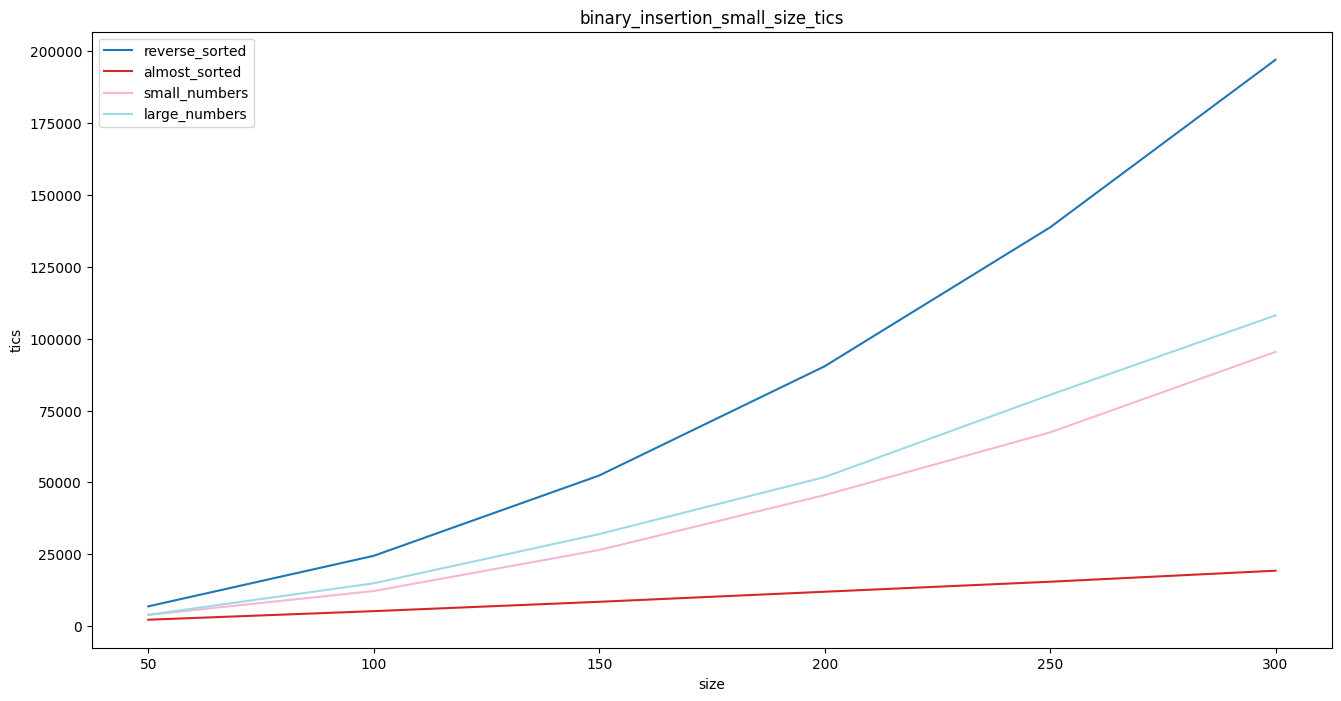

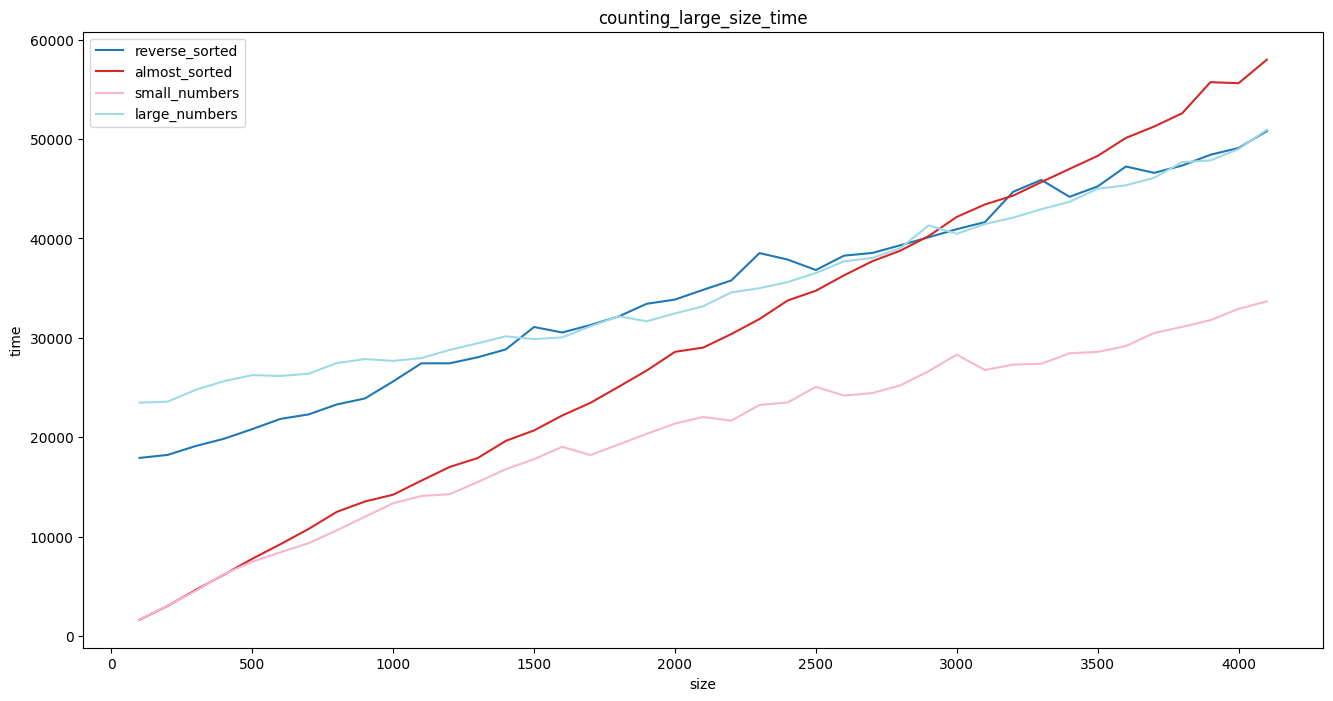

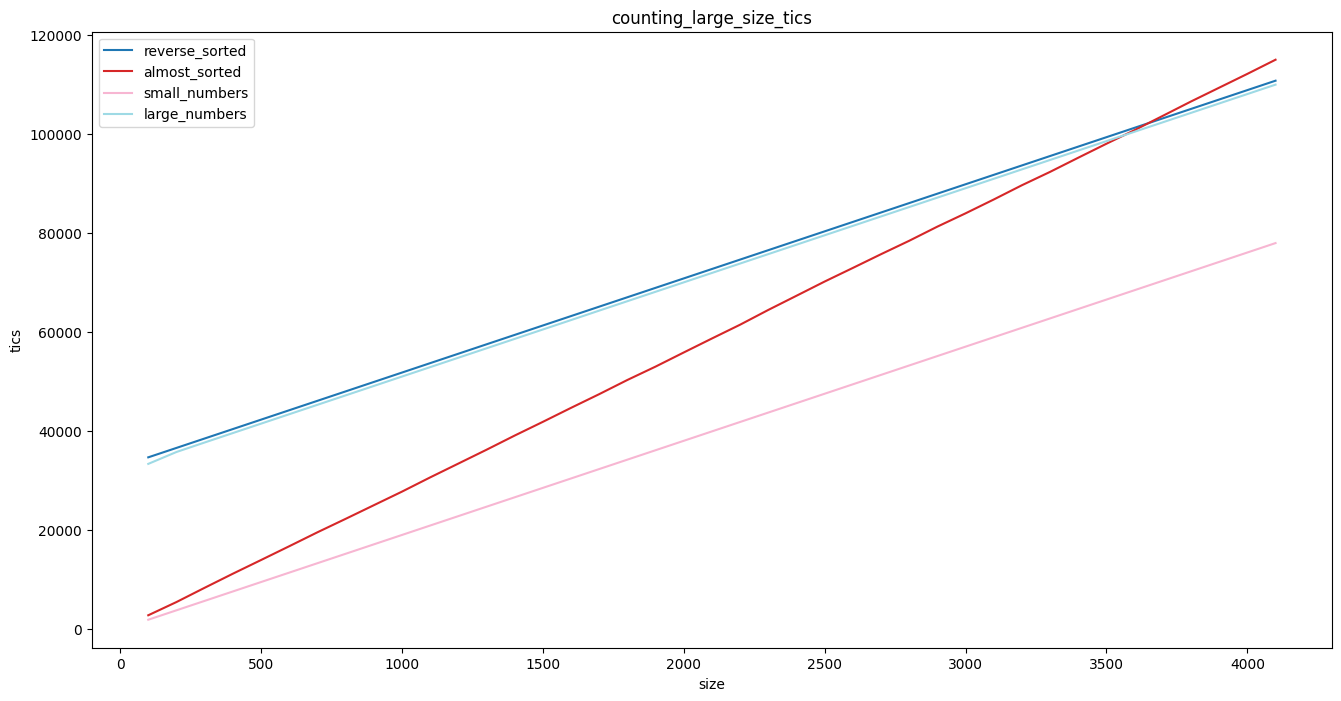

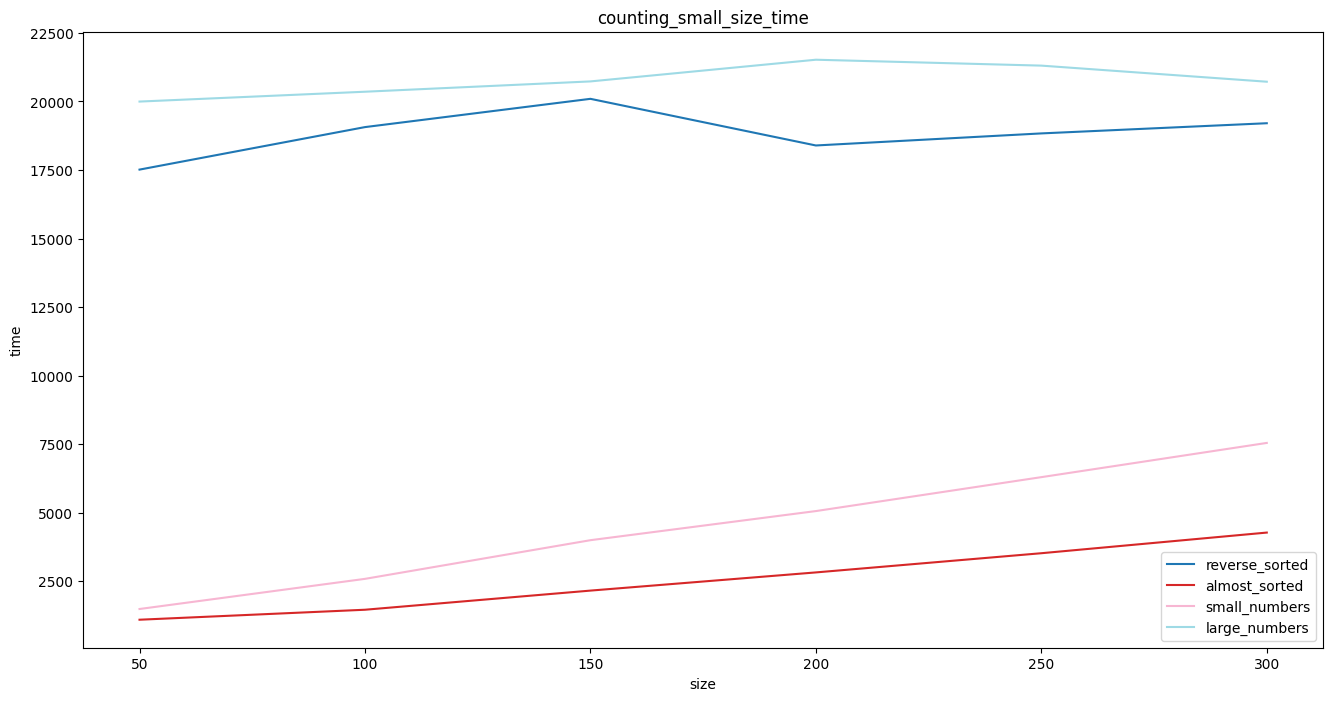

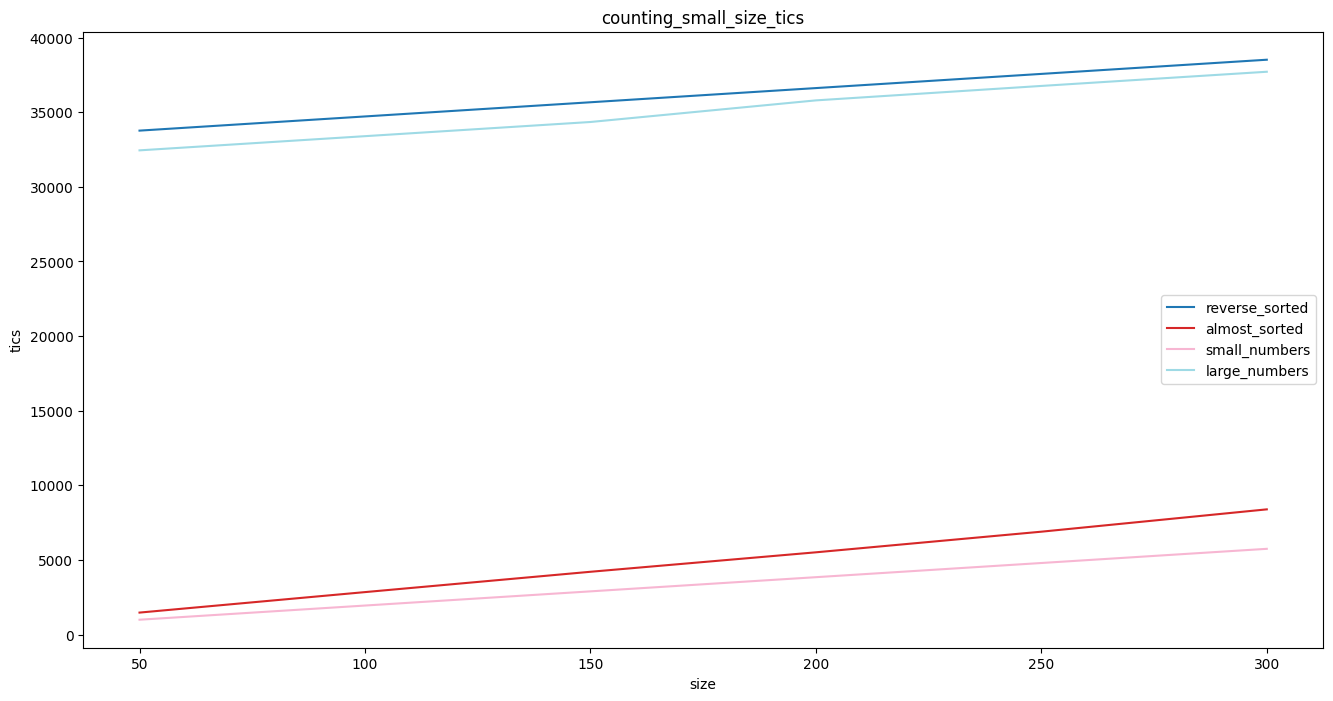

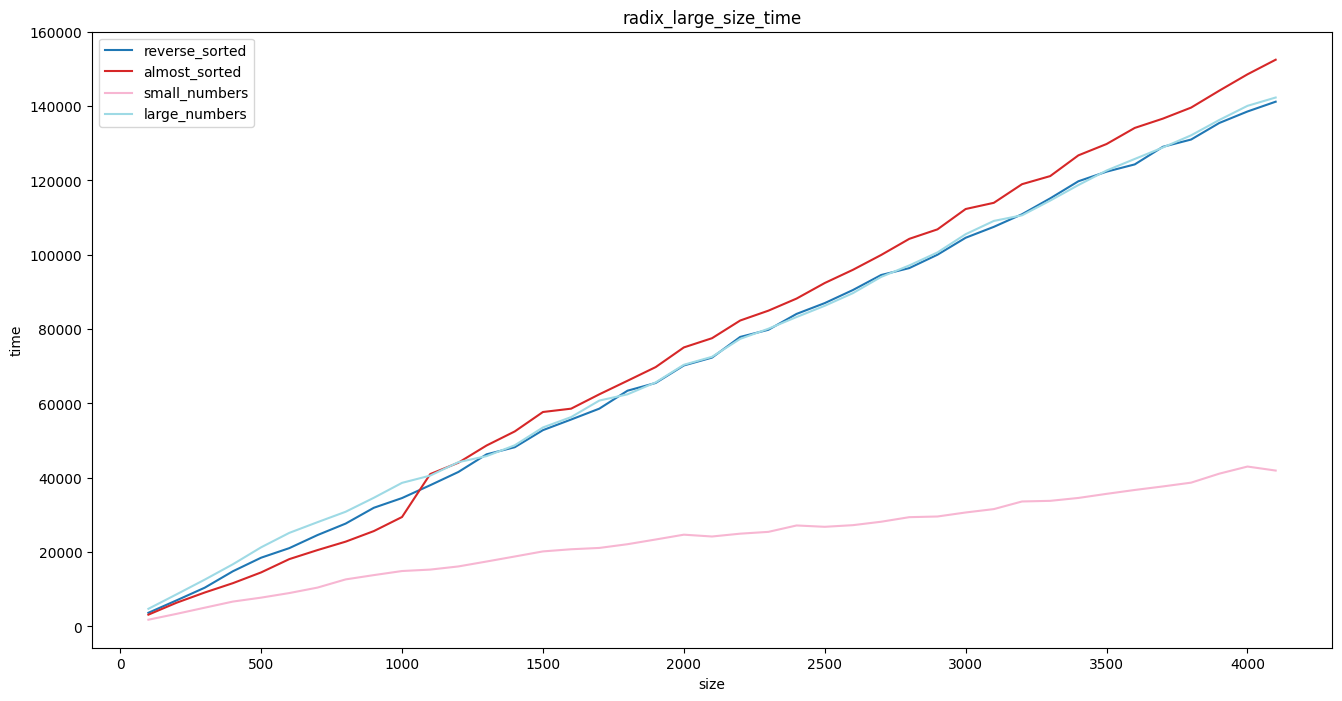

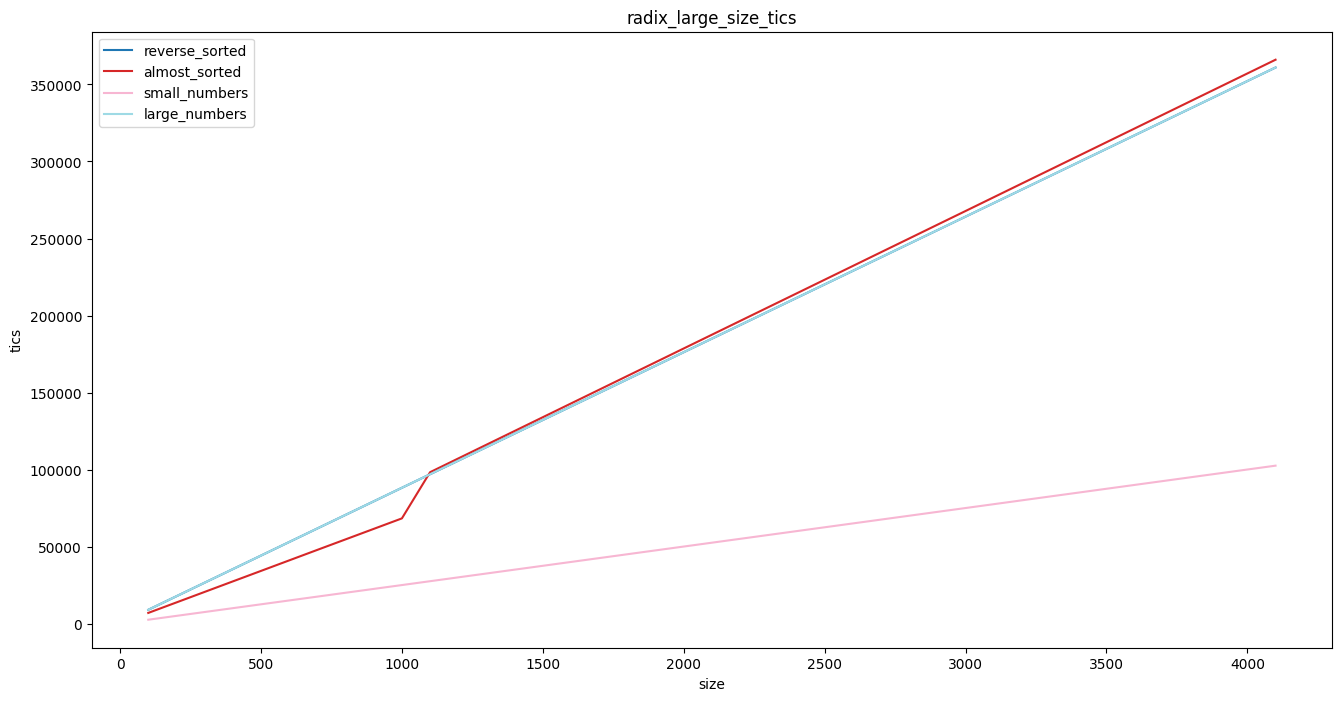

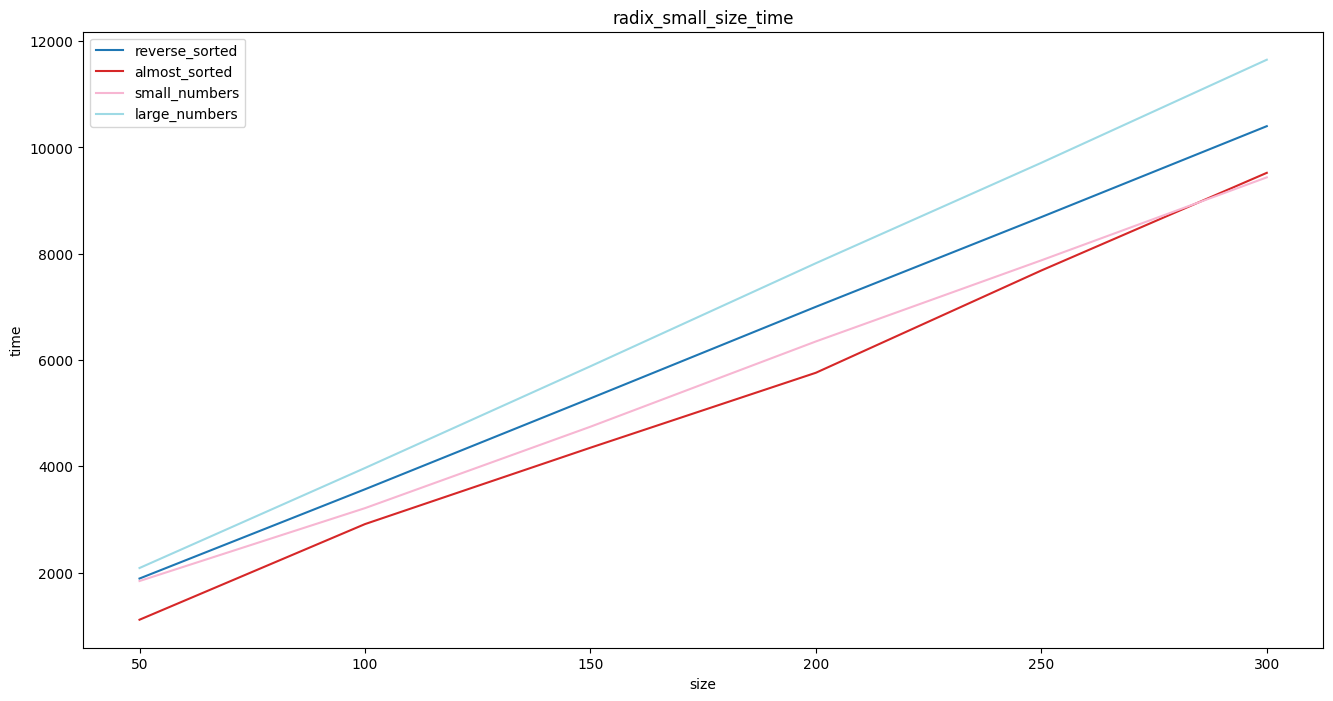

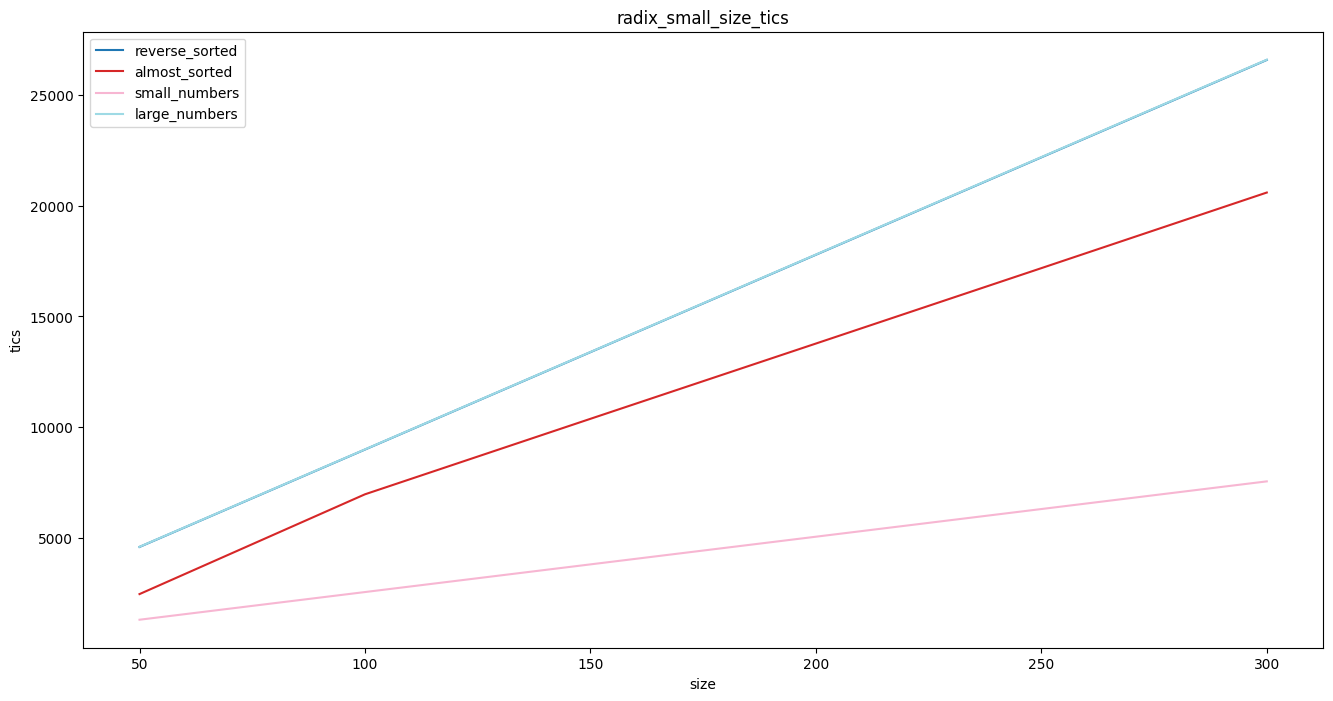

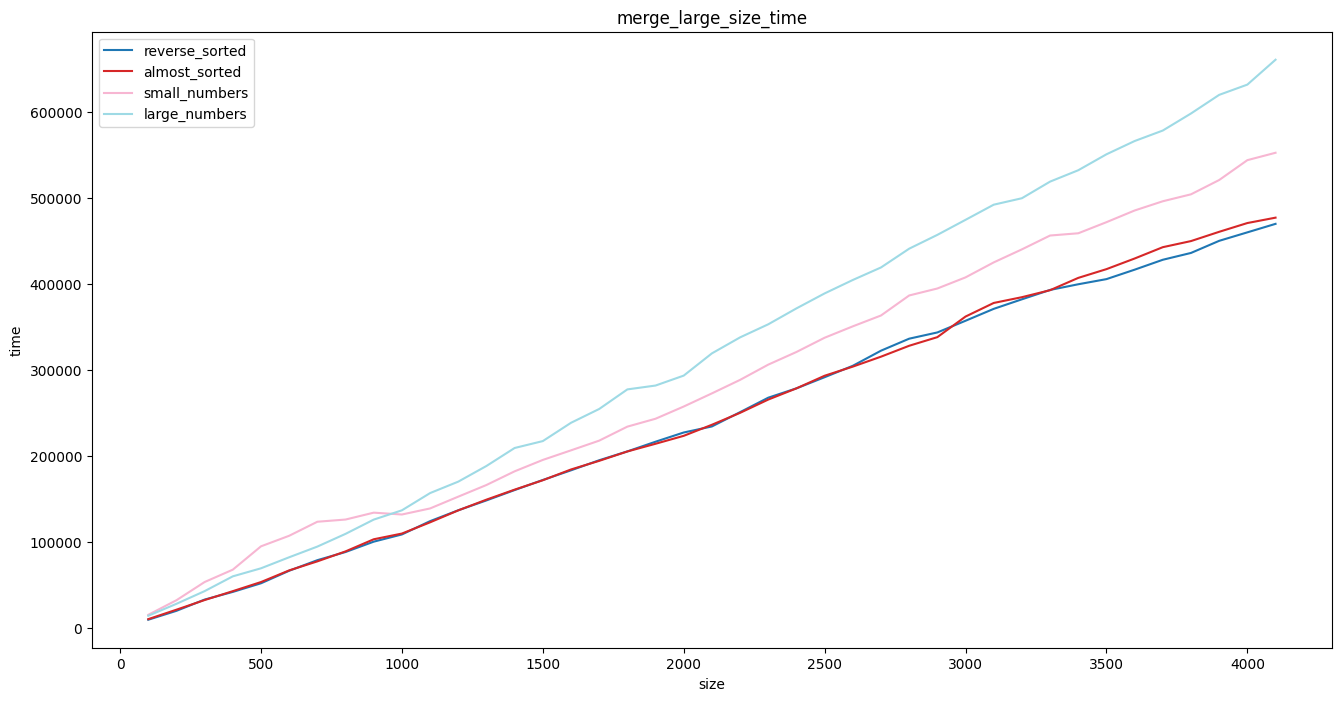

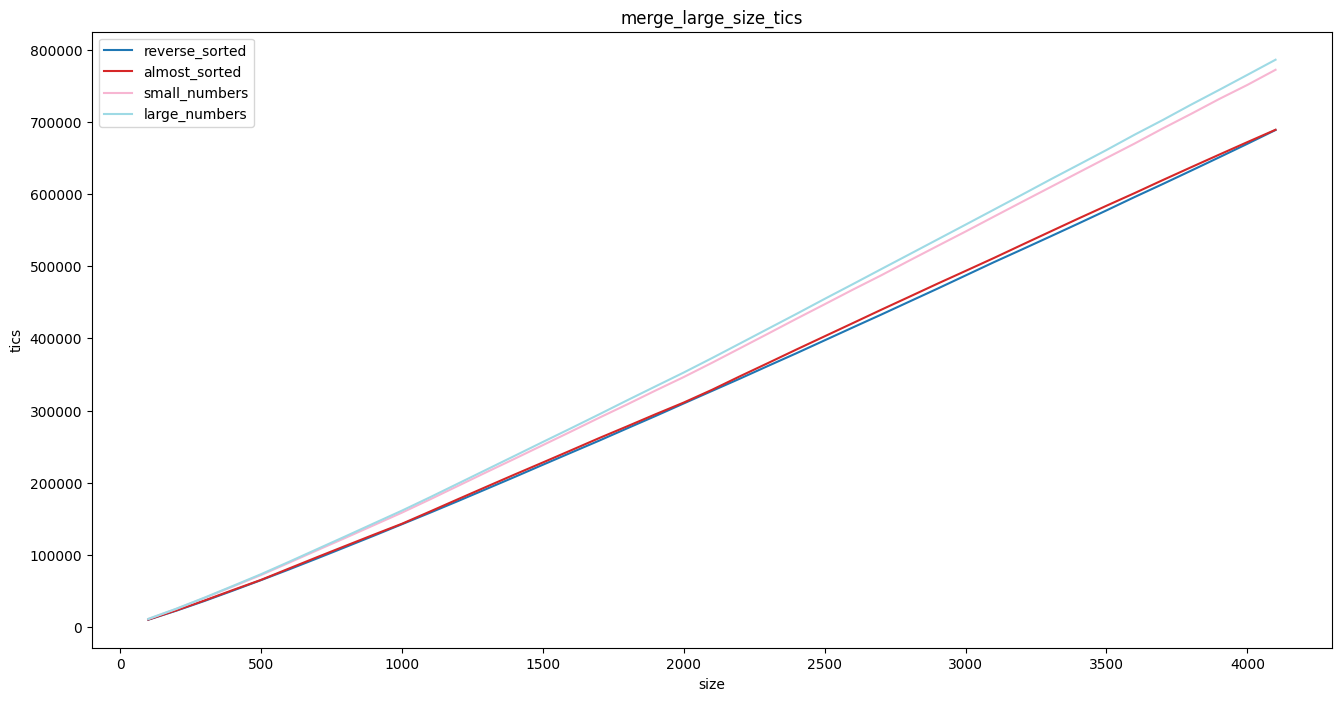

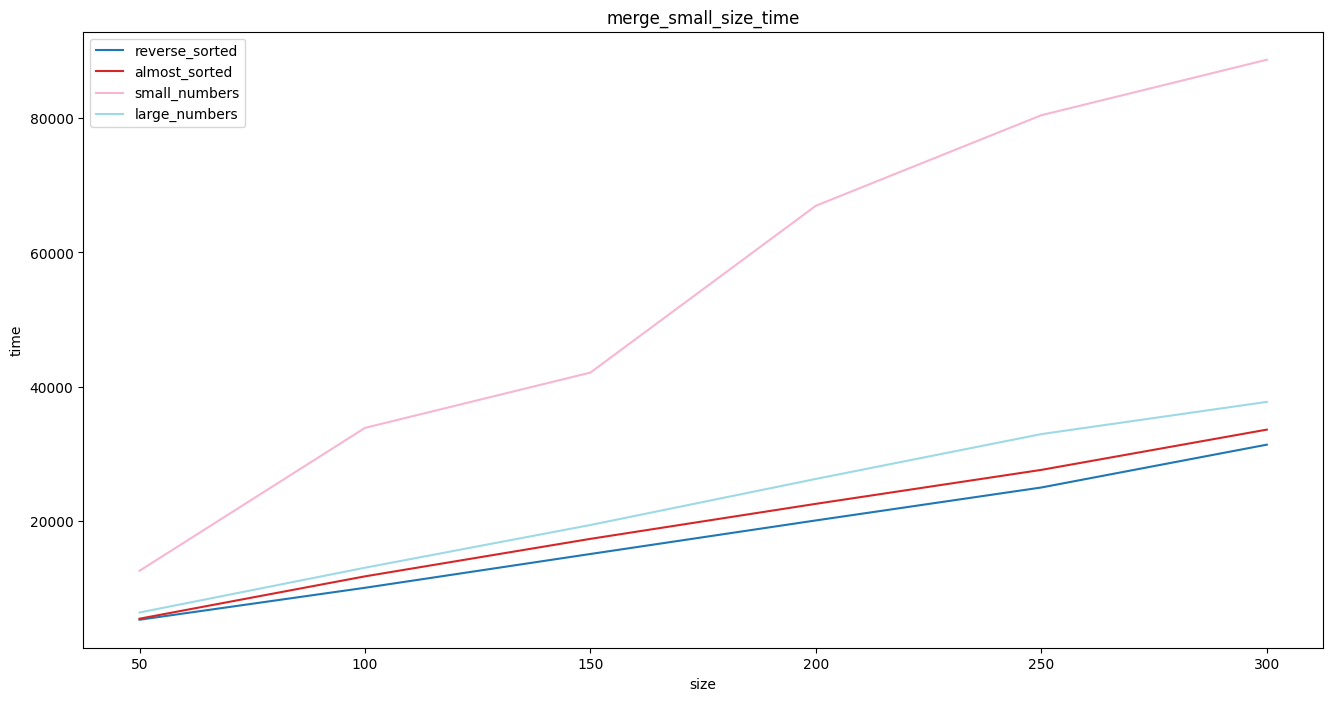

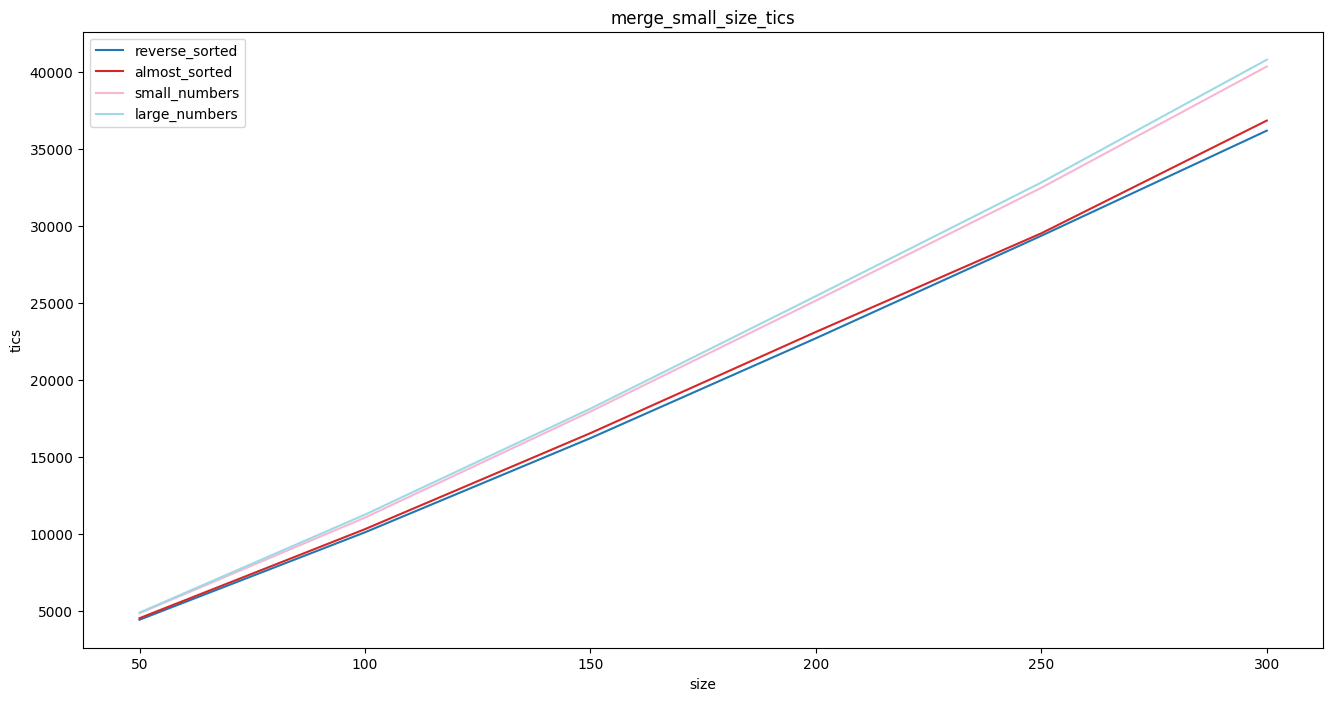

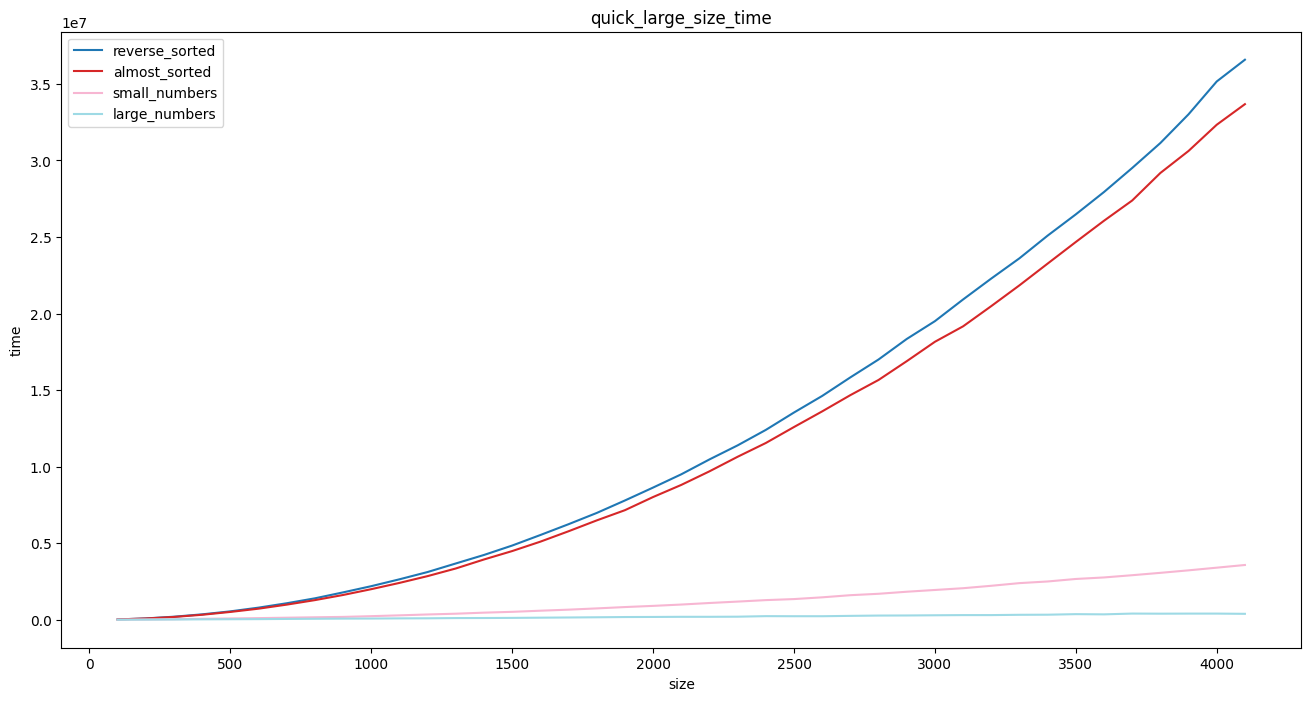

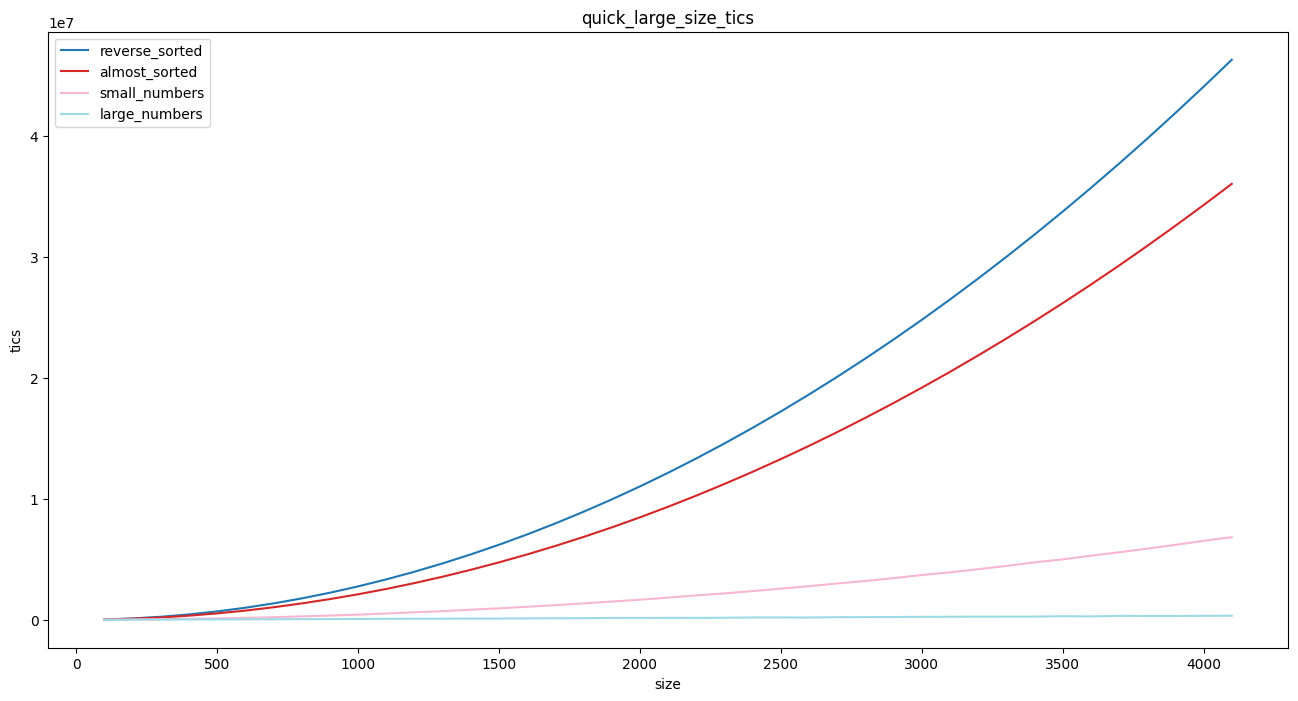

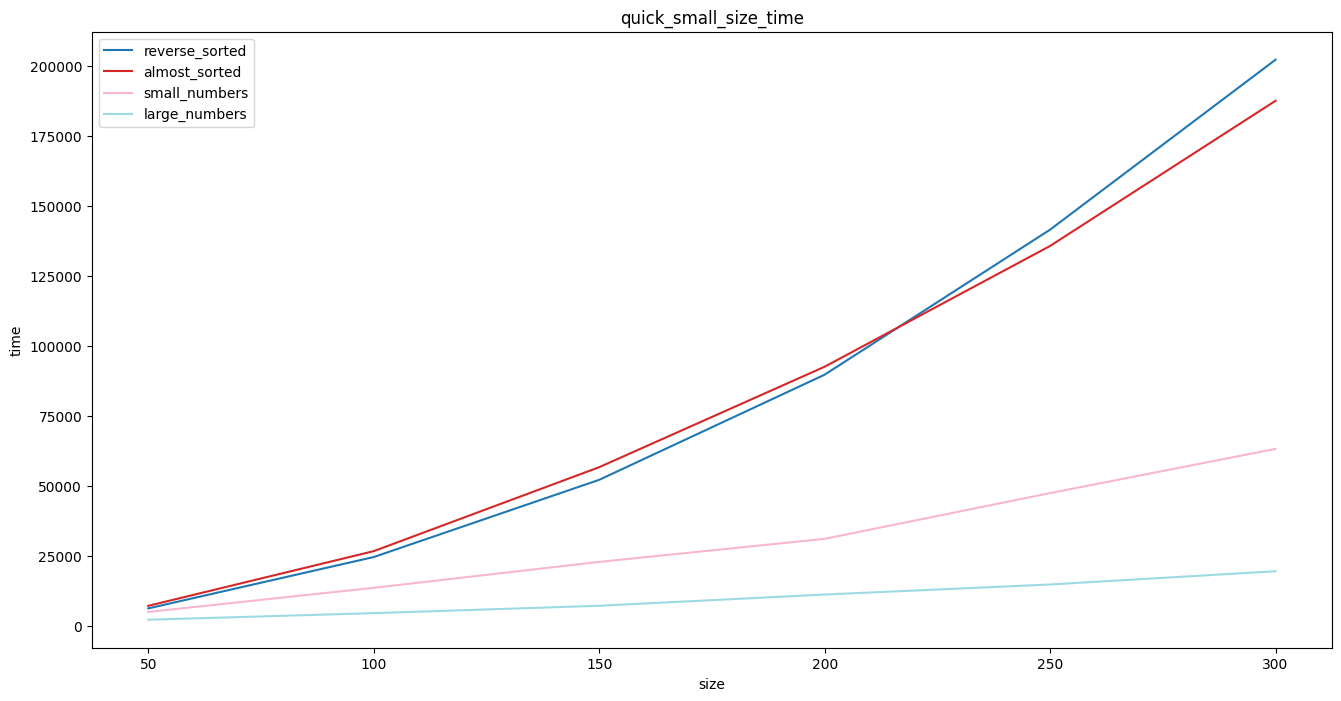

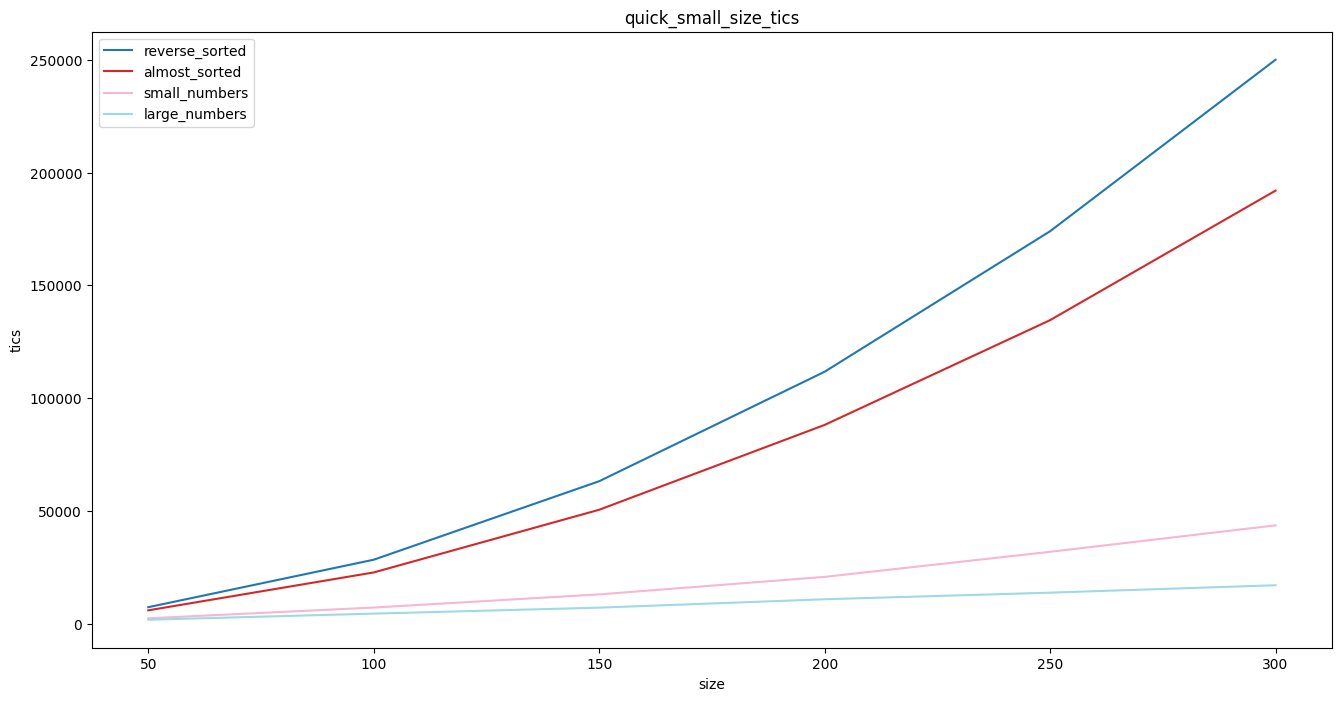

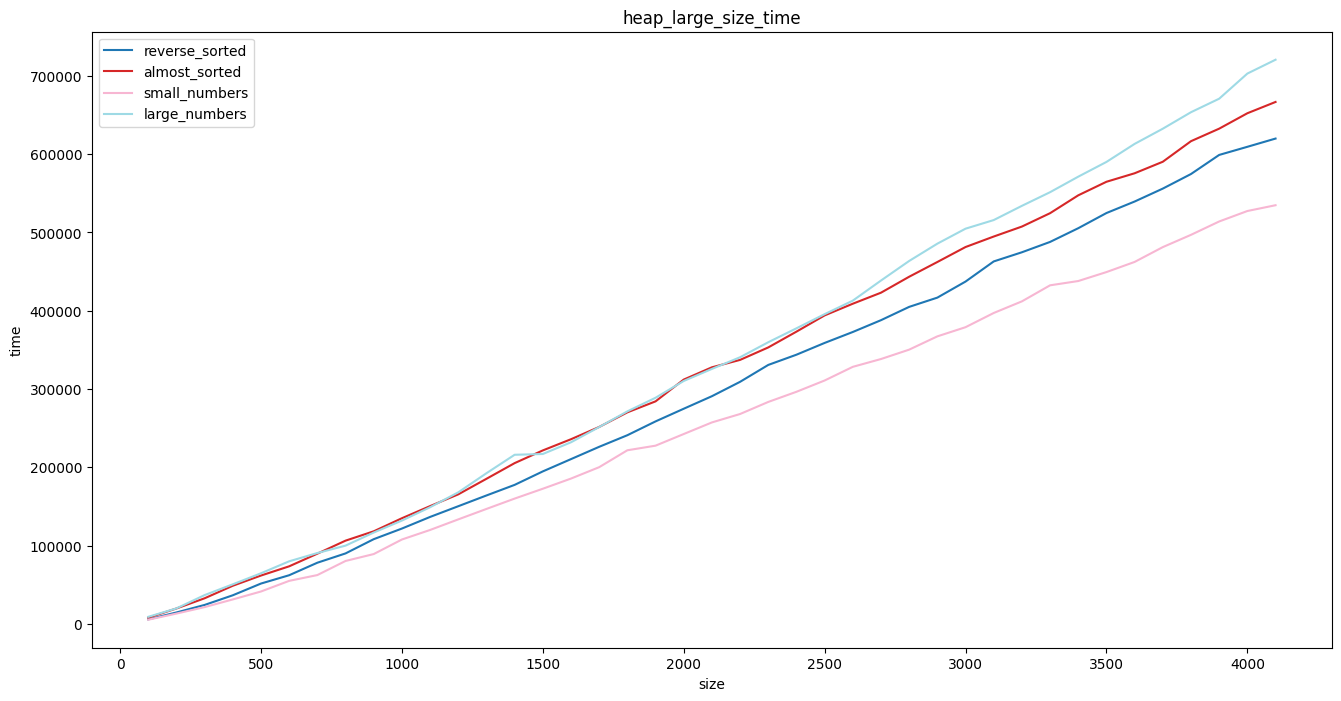

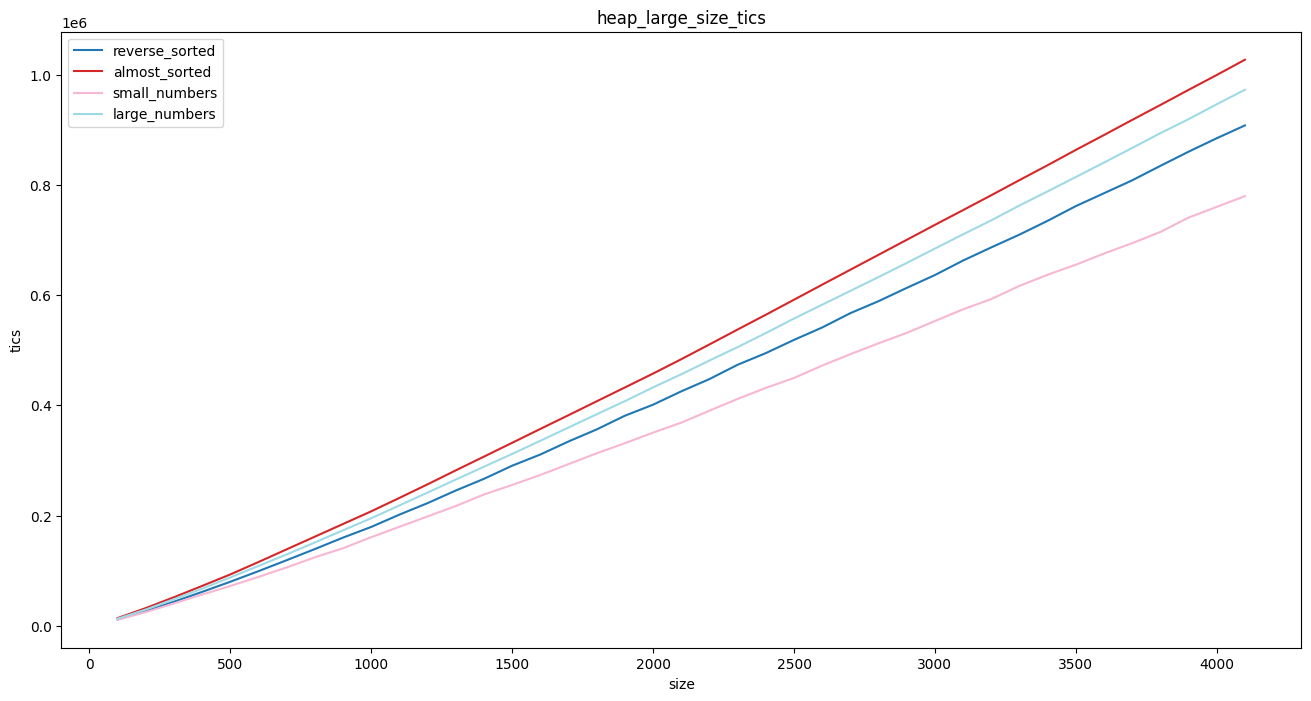

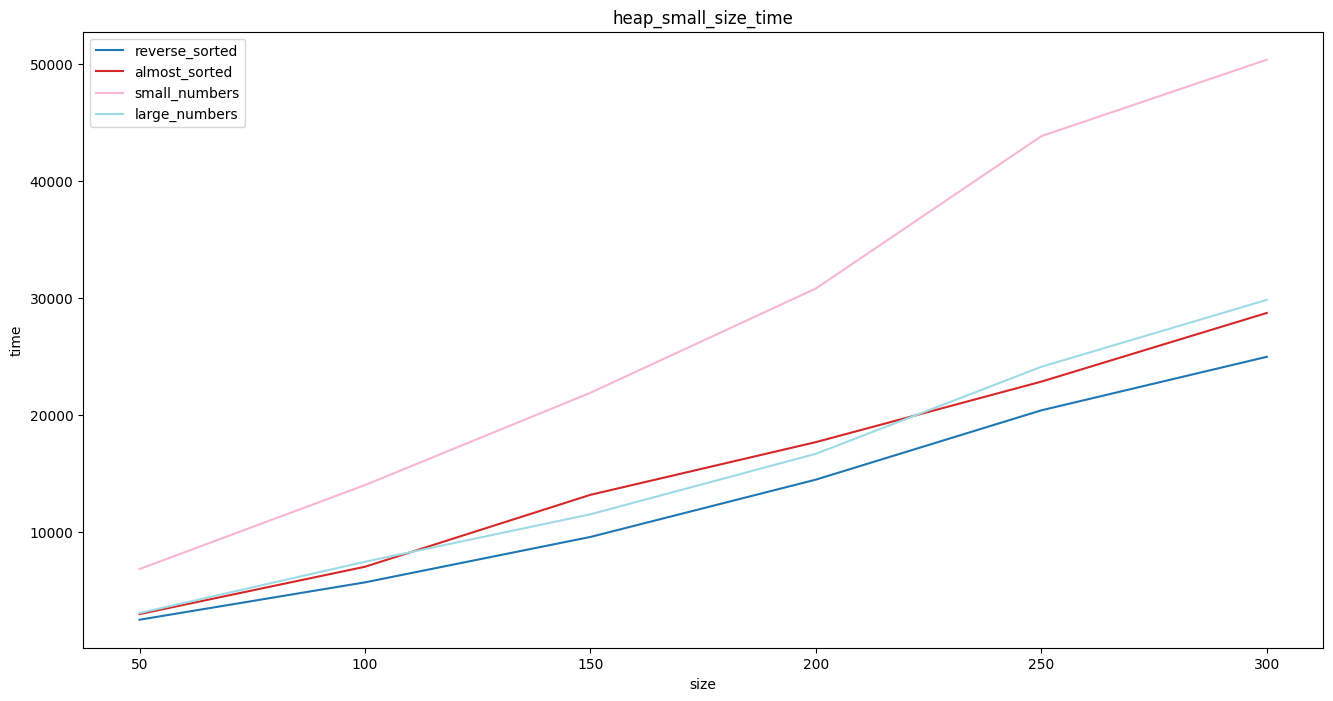

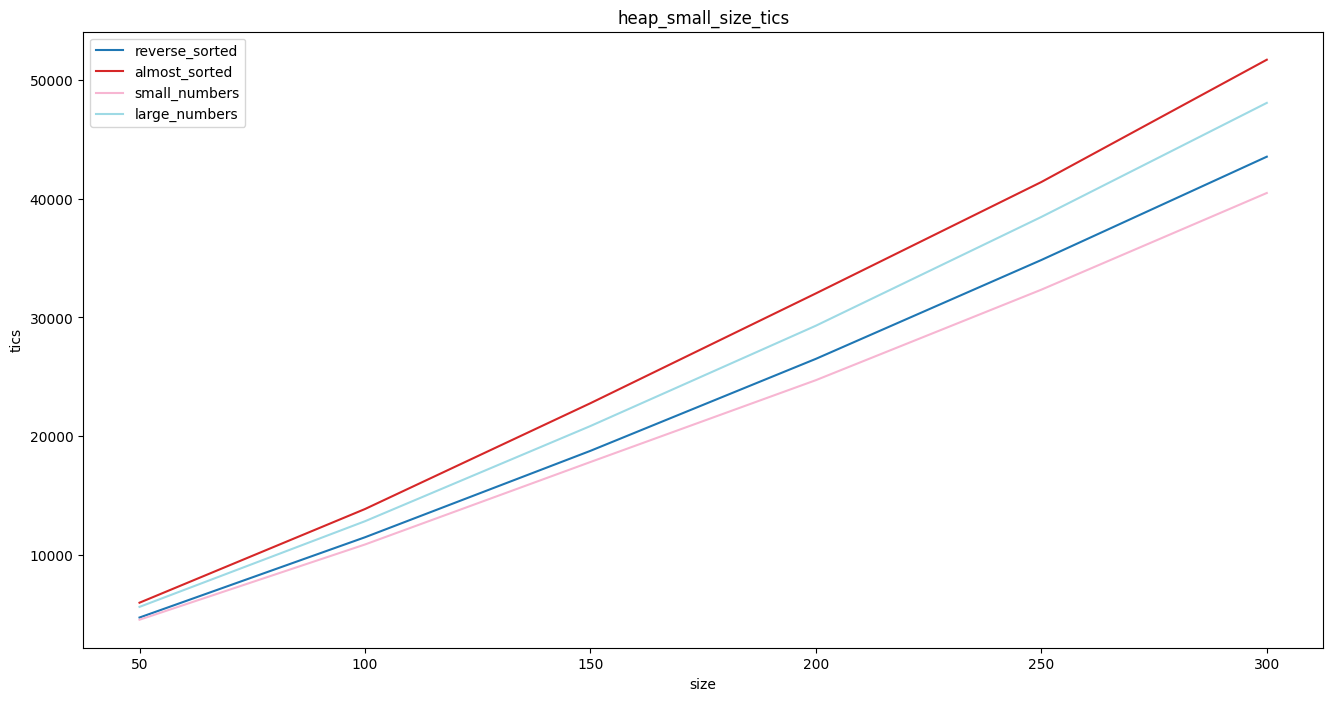

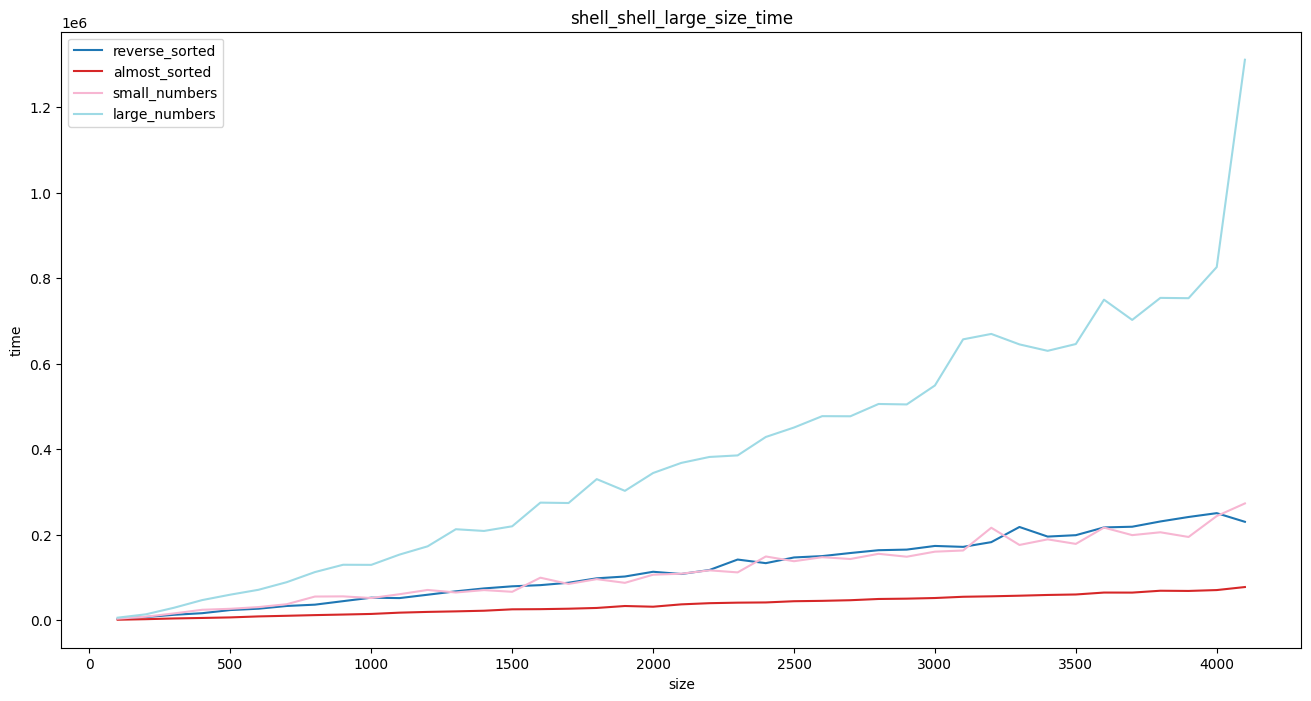

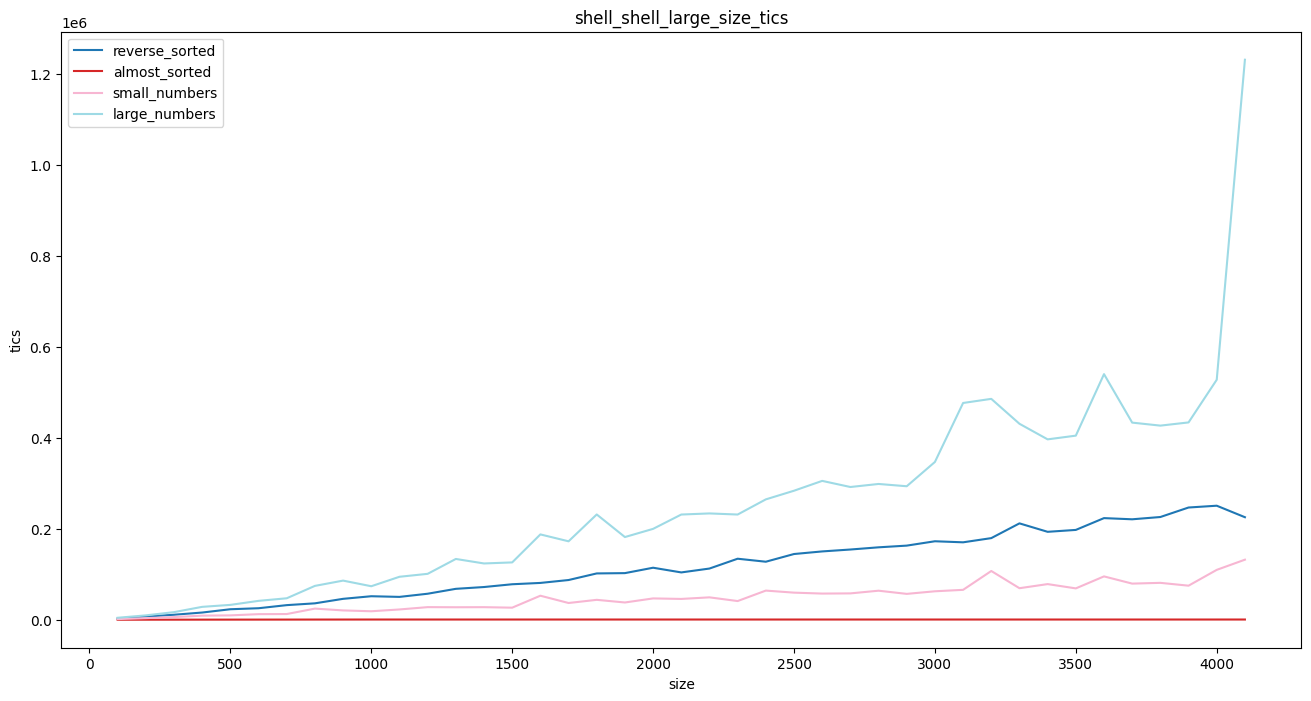

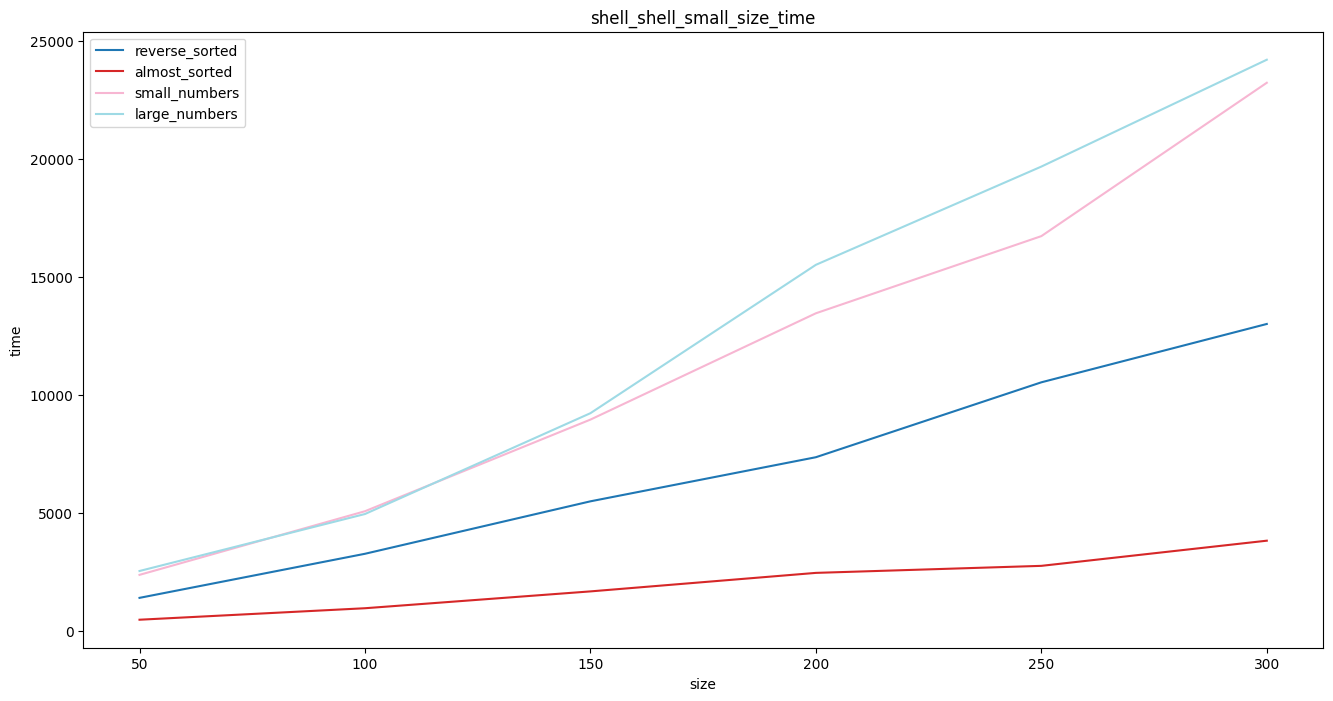

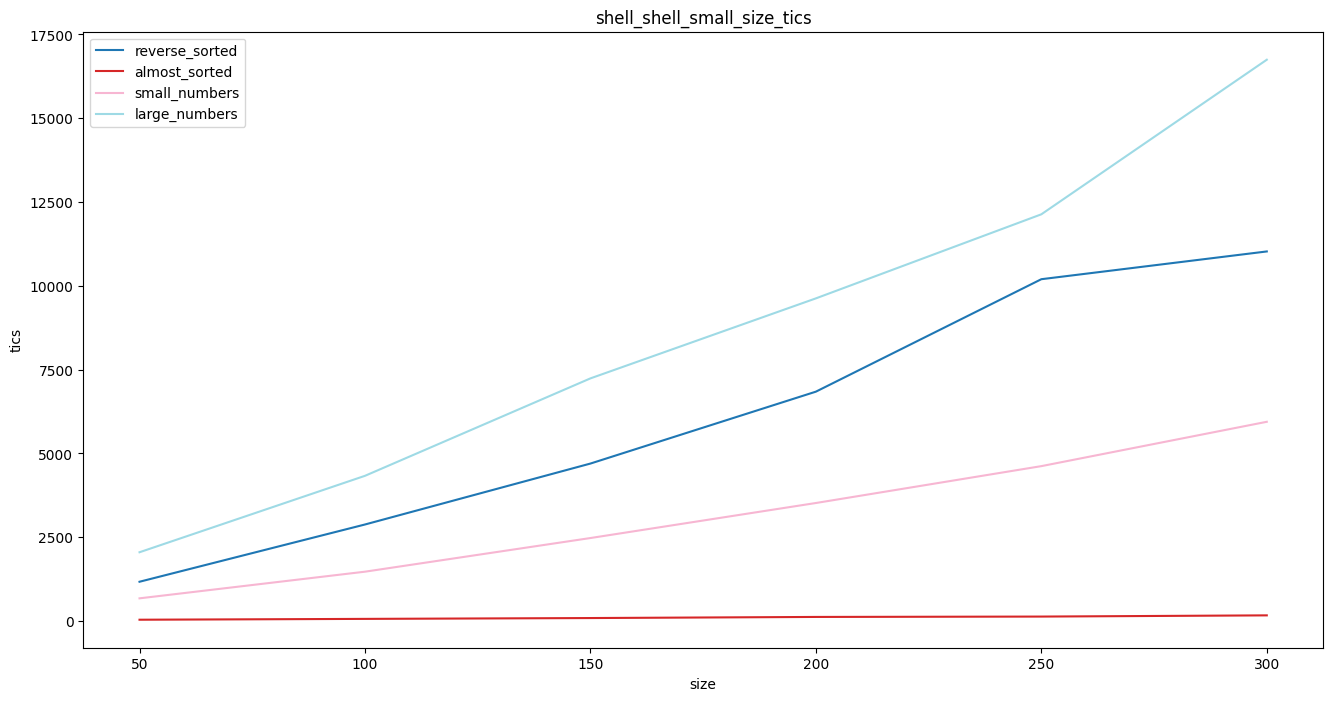

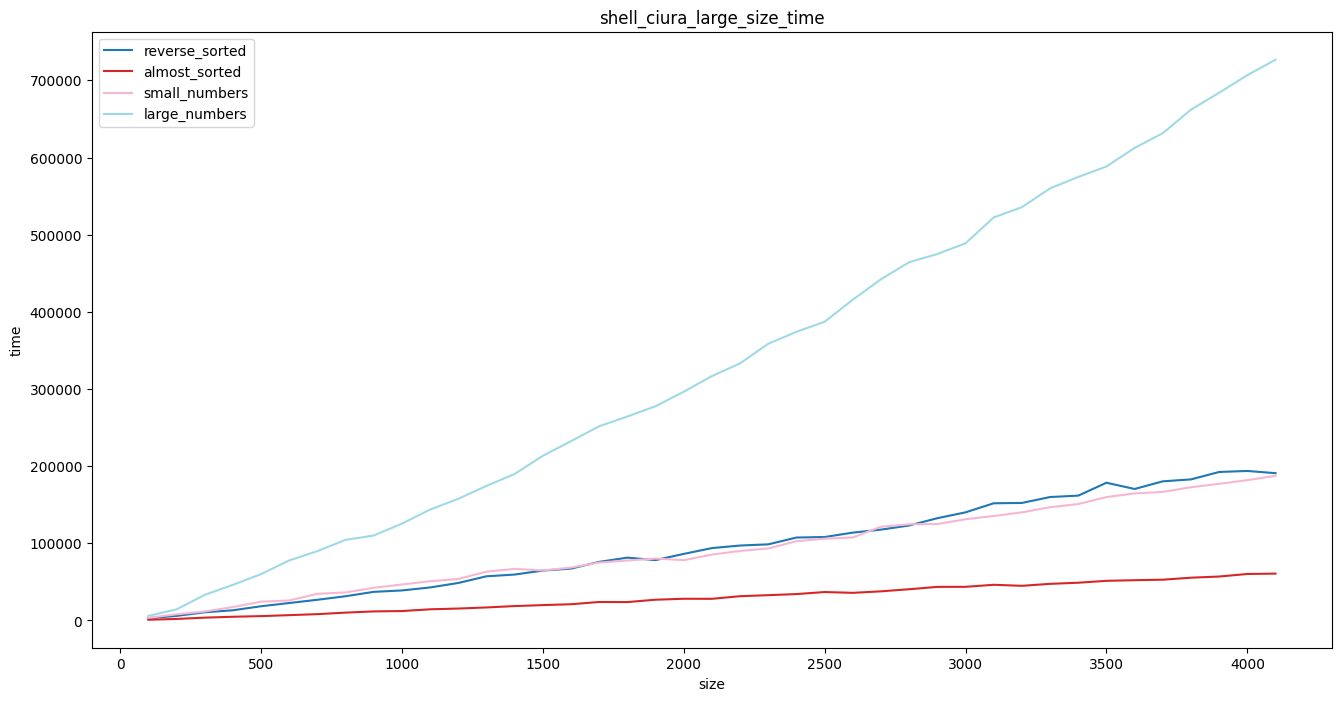

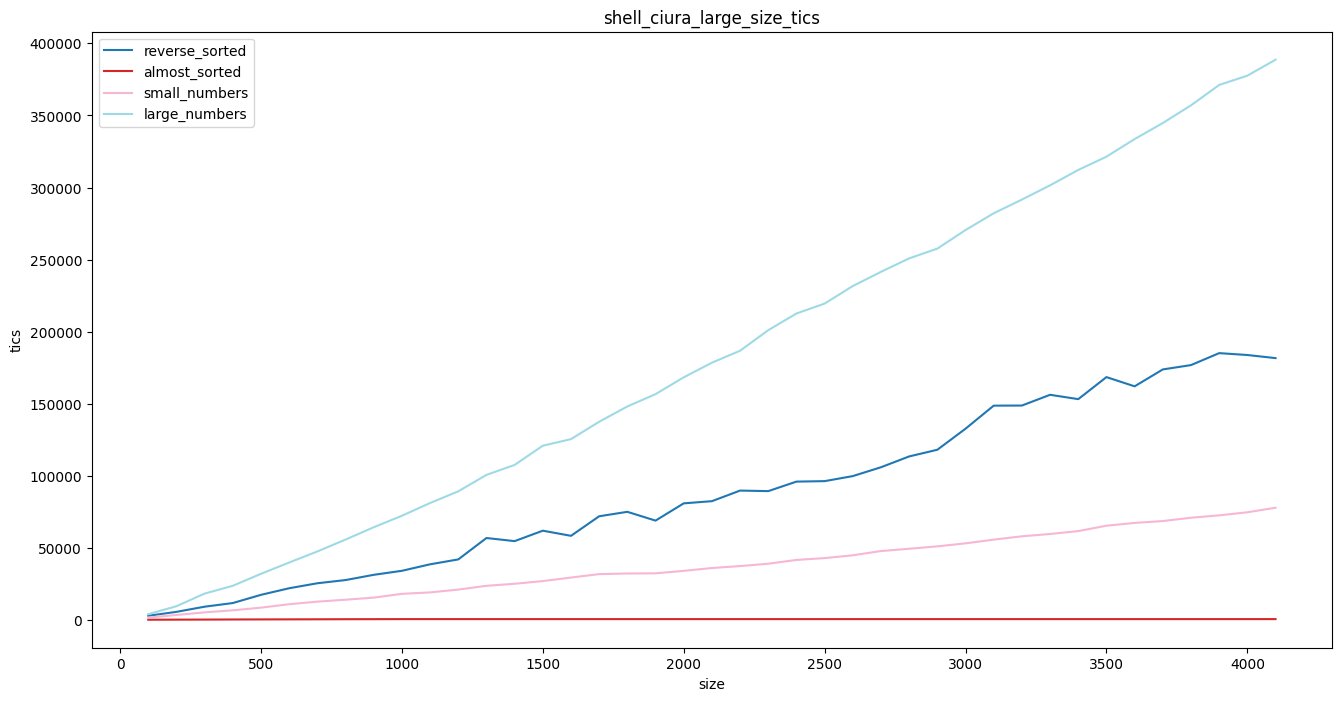

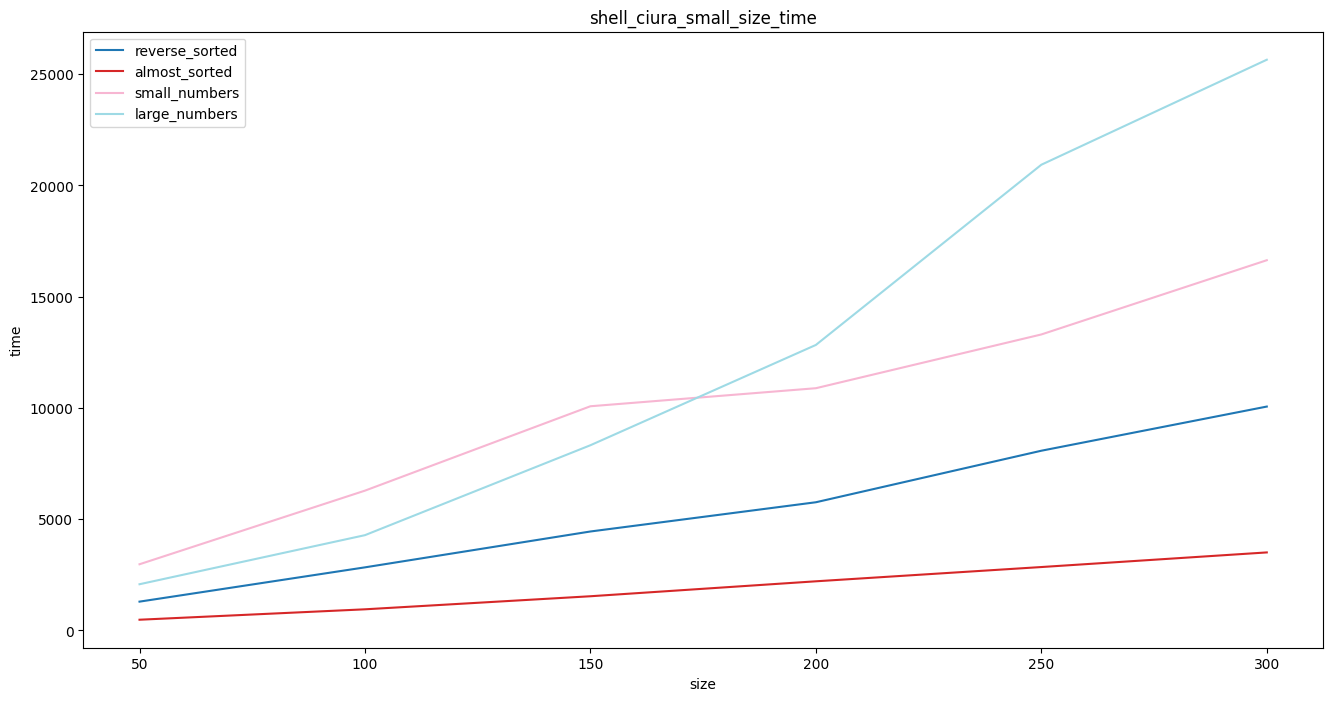

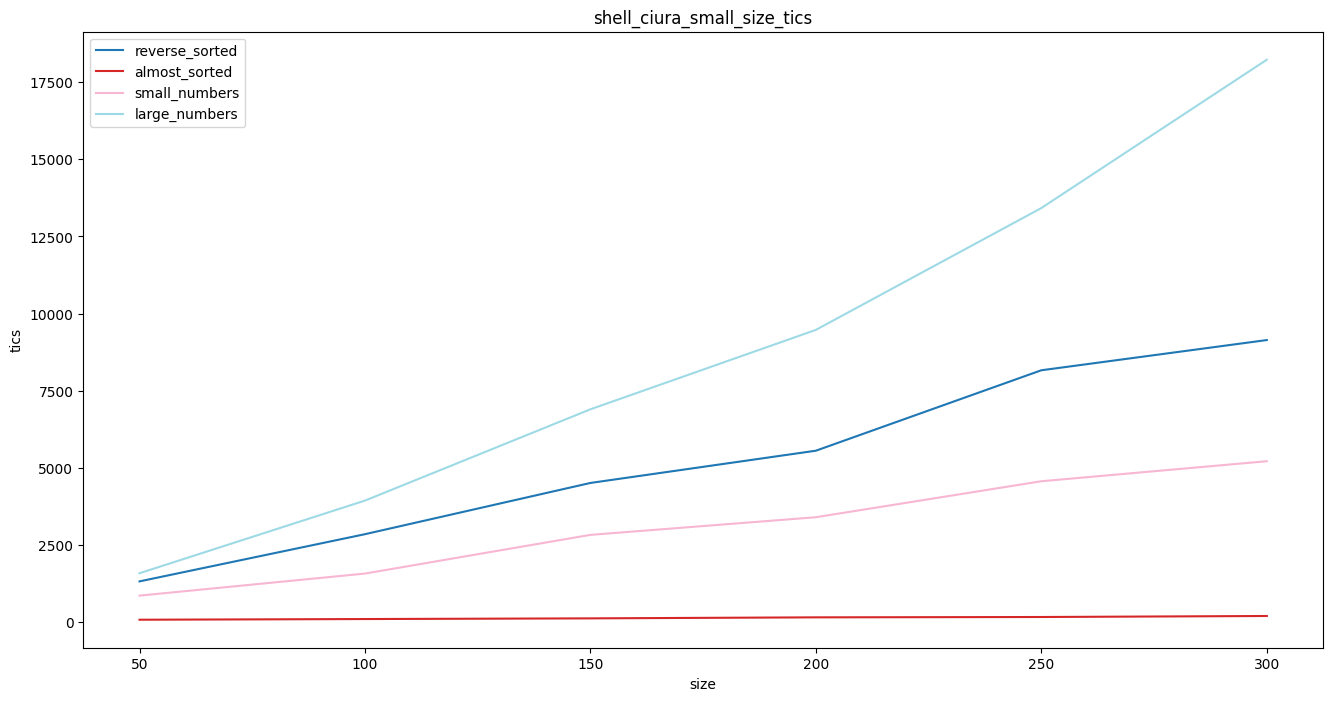

In [4]:
for method in methods:
    for size in ["l","s"]:
        for info in ["time","tics"]:
            res = pd.read_csv(f"{method}/data_{size}_{types[0]}_{info}.csv",sep=';').rename(columns={info: types[0]})
            for type in types[1:]:
                res = pd.merge(res,pd.read_csv(f"{method}/data_{size}_{type}_{info}.csv",sep=";").rename(columns={info: type}),on=['size'])
            res.set_index('size').plot(title = f"{method}_large_size_{info}" if size=="l" else f"{method}_small_size_{info}",ylabel = info,xlabel='size',colormap="tab20")

# Заполнение сравнительных таблиц

В данной части представлено заполнение таблиц, на которых происходит сравнение всех алгоритмов по времени и количеству операций при сортировке массивов одинаковых размеров

Названия выходных файлов имеют вид "{размер массивов}_{представленная информация}.csv"

In [ ]:
info="time"
size="l"
for size in ['l','s']:
    for info in ['time','tics']:
        flag = True;
        for method in methods:
            for type in types:
                if(flag):
                    flag = False
                    res = pd.read_csv(f"{method}/data_{size}_{type}_{info}.csv",sep=';').rename(columns={info: f"{method}_{type}"})
                else:
                    res = pd.merge(res,pd.read_csv(f"{method}/data_{size}_{type}_{info}.csv",sep=';').rename(columns={info: f"{method}_{type}"}),on=['size'])
        res.to_csv(f"{'large_size' if size == 'l' else 'small_size'}_{info}.csv", sep=';')